### UCSC

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, pearsonr
from functools import reduce


base_directory = '/fs/ess/PAS1475/Maoteng/Metastasis/UCSC'

subfolders = ['Chin 2006', 'Miller 2005', 'Desmedt_2007', 'Wang_2005', 'Caldas_2007']

dataframes = {}

for folder in subfolders:
    print(folder)
    full_path = os.path.join(base_directory, folder)
    
    for filename in os.listdir(full_path):

        if filename.endswith('clinicalMatrix') or filename.endswith('genomicMatrix'):

            file_path = os.path.join(full_path, filename)

            if filename.endswith('genomicMatrix'):

                df = pd.read_csv(file_path, sep='\t', index_col=0)
            else:

                df = pd.read_csv(file_path, sep='\t')

            key = f"{folder}_{filename}"
            dataframes[key] = df

            print(f"DataFrame from {filename} in {folder} loaded and stored with shape {df.shape}")

Chin 2006
DataFrame from chin2006_public_chin2006Exp_genomicMatrix in Chin 2006 loaded and stored with shape (21815, 118)
DataFrame from chin2006_public_chin2006_public_clinicalMatrix in Chin 2006 loaded and stored with shape (173, 43)
Miller 2005
DataFrame from miller2005_public_miller2005_public_clinicalMatrix in Miller 2005 loaded and stored with shape (251, 15)
DataFrame from miller2005_public_miller2005_genomicMatrix in Miller 2005 loaded and stored with shape (24711, 251)
Desmedt_2007
DataFrame from desmedt2007_genomicMatrix in Desmedt_2007 loaded and stored with shape (21815, 198)
DataFrame from desmedt2007_public_clinicalMatrix in Desmedt_2007 loaded and stored with shape (198, 29)
Wang_2005
DataFrame from wang2005Exp_genomicMatrix in Wang_2005 loaded and stored with shape (21815, 286)
DataFrame from wang2005_public_clinicalMatrix in Wang_2005 loaded and stored with shape (286, 8)
Caldas_2007
DataFrame from Caldas2007_clinicalMatrix in Caldas_2007 loaded and stored with shape (

In [2]:
gene_map = pd.read_csv('/fs/ess/PAS1475/Maoteng/Metastasis/UCSC/ucscGenomeBrowser_hg18.probeMap', sep='\t', index_col=0)
display(gene_map)
gene_map_no_duplicates = gene_map[~gene_map.index.duplicated(keep=False)]

gene_map_no_duplicates = gene_map_no_duplicates[gene_map_no_duplicates['gene'].notna()]
gene_map_no_duplicates = gene_map_no_duplicates[~gene_map_no_duplicates['gene'].str.contains(',')]
display(gene_map_no_duplicates)

,gene,chrom,chromStart,chromEnd,strand,thickStart,thickEnd,blockCount,blockSizes,blockStarts
#id,,,,,,,,,,
1007_s_at,NaN,chr6,30964145,30975910,+,30964145,30975910,21,"426,103,229,148,100,187,247,96,152,166,111,245...","0,519,813,2584,2991,3613,3907,4679,4883,6117,7..."
1053_at,RFC2,chr7,73284026,73306668,-,73284026,73306668,15,"27,177,50,10,190,114,81,66,158,101,102,107,42,...","0,27,205,256,267,3772,5602,7163,8178,11386,149..."
117_at,HSPA6,chr1,159761073,159763004,+,159761073,159763004,1,"1932,","0,"
121_at,"PAX8,LOC654433",chr2,113691410,113752958,-,113691410,113752958,19,"486,92,41,180,83,196,164,87,102,189,120,177,12...","0,487,581,622,803,887,1084,2730,9793,18032,192..."
1255_g_at,GUCA1A,chr6,42248920,42255770,+,42248920,42255770,23,"5,7,71,146,68,312,150,94,319,102,3,21,5,13,19,...","0,6,13,84,231,299,5076,5598,6039,6359,6462,646..."
...,...,...,...,...,...,...,...,...,...,...
91703_at,EHBP1L1,chr11,65114224,65116527,+,65114224,65116527,6,"34,59,130,50,38,278,","0,316,1567,1799,1876,2026,"
91816_f_at,MEX3D,chr19,1505671,1506414,-,1505671,1506414,5,"242,121,22,196,112,","0,242,363,400,632,"
91826_at,EPS8L1,chr19,60290003,60291103,+,60290003,60291103,8,"12,2,13,13,75,57,262,119,","0,13,16,31,479,556,705,982,"


,gene,chrom,chromStart,chromEnd,strand,thickStart,thickEnd,blockCount,blockSizes,blockStarts
#id,,,,,,,,,,
1053_at,RFC2,chr7,73284026,73306668,-,73284026,73306668,15,"27,177,50,10,190,114,81,66,158,101,102,107,42,...","0,27,205,256,267,3772,5602,7163,8178,11386,149..."
117_at,HSPA6,chr1,159761073,159763004,+,159761073,159763004,1,"1932,","0,"
1255_g_at,GUCA1A,chr6,42248920,42255770,+,42248920,42255770,23,"5,7,71,146,68,312,150,94,319,102,3,21,5,13,19,...","0,6,13,84,231,299,5076,5598,6039,6359,6462,646..."
1294_at,UBA7,chr3,49817644,49826427,-,49817644,49826427,30,"231,101,93,192,93,83,184,75,184,65,206,166,156...","0,690,866,2529,2813,3179,3769,4183,4335,4608,4..."
1316_at,THRA,chr17,35472711,35499815,+,35472711,35499815,13,"30,131,350,68,101,148,206,147,259,437,139,173,79,","0,30,11260,13939,14576,20903,21678,23775,25310..."
...,...,...,...,...,...,...,...,...,...,...
91703_at,EHBP1L1,chr11,65114224,65116527,+,65114224,65116527,6,"34,59,130,50,38,278,","0,316,1567,1799,1876,2026,"
91816_f_at,MEX3D,chr19,1505671,1506414,-,1505671,1506414,5,"242,121,22,196,112,","0,242,363,400,632,"
91826_at,EPS8L1,chr19,60290003,60291103,+,60290003,60291103,8,"12,2,13,13,75,57,262,119,","0,13,16,31,479,556,705,982,"


In [3]:
VV_gene_map = pd.read_csv('/fs/ess/PAS1475/Maoteng/Metastasis/UCSC/probeAgilentVV', sep='\t', index_col=0)
display(VV_gene_map)
VV_gene_map_no_duplicates = VV_gene_map[~VV_gene_map.index.duplicated(keep=False)]

VV_gene_map_no_duplicates = VV_gene_map_no_duplicates[VV_gene_map_no_duplicates['gene'].notna()]
VV_gene_map_no_duplicates = VV_gene_map_no_duplicates[~VV_gene_map_no_duplicates['gene'].str.contains(',')]
display(VV_gene_map_no_duplicates)

,gene,chrom,chromStart,chromEnd,strand
#id,,,,,
AL137714,NaN,chr1,4266,4323,-
AL137655,NaN,chr1,324137,324197,+
AI432517_RC,NaN,chr1,554404,554460,+
Contig5109_RC,NaN,chr1,557389,557441,+
Contig23837_RC,NaN,chr1,750689,750749,+
...,...,...,...,...,...
AF248480,NaN,chrY,25461104,25461164,+
NM_004081,"DAZ4,DAZ1,DAZ2,DAZ3,208281_x_at,216351_x_at",chrY,25462132,25462192,+
NM_004825,"CDY1B,CDY1,207646_s_at,207647_at",chrY,26179529,26179589,+


,gene,chrom,chromStart,chromEnd,strand
#id,,,,,
NM_021170,HES4,chr1,924934,924989,-
Contig28384_RC,TTLL10,chr1,1111044,1111104,+
Contig56492_RC,B3GALT6,chr1,1160171,1160231,+
NM_018618,UBE2J2,chr1,1179194,1179254,-
NM_014188,SSU72,chr1,1467051,1467106,-
...,...,...,...,...,...
Contig53061_RC,GAB3,chrX,153556843,153556903,-
Contig51526_RC,RAB39B,chrX,154141237,154141297,-
NM_012151,F8A1,chrX,154266119,154266179,+


#### Chin 2006

In [4]:
import pandas as pd


Chin_clinical_df = dataframes['Chin 2006_chin2006_public_chin2006_public_clinicalMatrix']
Chin_genomic_df = dataframes['Chin 2006_chin2006_public_chin2006Exp_genomicMatrix']

Chin_sample_ids_in_genomic = list(Chin_genomic_df.columns)

Chin_filtered_clinical_df = Chin_clinical_df[Chin_clinical_df['sampleID'].isin(Chin_sample_ids_in_genomic)].copy()


Chin_nodal_status_counts = Chin_filtered_clinical_df['nodal_status'].value_counts()


print(Chin_nodal_status_counts)


Chin_genomic_df['index'] = Chin_genomic_df.index
Chin_genomic_df['index'] = Chin_genomic_df['index'].map(gene_map_no_duplicates['gene'])


if Chin_genomic_df['index'].duplicated().any():

    Chin_genomic_df = Chin_genomic_df.groupby(Chin_genomic_df['index']).sum()

Chin_filtered_genomic_df = Chin_genomic_df.loc[:, Chin_filtered_clinical_df['sampleID'].values]

Chin_filtered_genomic_df.index = Chin_filtered_genomic_df.index.to_series().replace({
    'EIF1': 'SUI1'
})

Chin_filtered_genomic_df.columns = ['Chin_' + col for col in Chin_filtered_genomic_df.columns]


Chin_filtered_clinical_df['Chin_DRI.time'] = Chin_filtered_clinical_df['DRI.time']


display(Chin_filtered_clinical_df)

display(Chin_filtered_genomic_df)

Chin_dri_time_list = Chin_filtered_clinical_df['Chin_DRI.time'].tolist()

print(Chin_dri_time_list)

1    67
0    51
Name: nodal_status, dtype: int64


,sampleID,M,N,SBR_grade,T,_INTEGRATION,_PATIENT,age_dx,allrec_binary,allrec_time,...,rad,size,stage,subCor,subEuc,subtype2,subtype3,subtype4,subtype5,Chin_DRI.time
0,b0165,0.0,0.0,3.0,1.0,b0165,b0165,43.0,0.0,13.75,...,0.0,1.5,1.0,norm,erbb2,2.0,3.0,4.0,5.0,13.75
4,b0241,0.0,0.0,2.0,1.0,b0241,b0241,68.0,0.0,9.80,...,0.0,1.5,1.0,lumA,lumA,2.0,3.0,4.0,5.0,9.80
5,b0243,0.0,0.0,2.0,1.0,b0243,b0243,40.0,0.0,14.15,...,1.0,2.0,1.0,norm,norm,2.0,2.0,2.0,2.0,14.15
6,b0244,0.0,0.0,NaN,2.0,b0244,b0244,49.0,0.0,14.20,...,0.0,3.4,2.0,basal,basal,1.0,1.0,1.0,1.0,14.20
9,b0251,0.0,0.0,2.0,2.0,b0251,b0251,78.0,0.0,4.04,...,0.0,3.0,2.0,lumA,lumA,2.0,2.0,2.0,2.0,4.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,s0229,1.0,1.0,3.0,2.0,s0229,s0229,53.0,1.0,0.00,...,0.0,4.0,4.0,basal,basal,1.0,1.0,1.0,1.0,0.00
169,s0350,0.0,1.0,3.0,3.0,s0350,s0350,35.0,0.0,5.61,...,1.0,7.0,3.0,lumA,lumA,2.0,3.0,4.0,4.0,5.61
170,s1511,NaN,1.0,3.0,2.0,s1511,s1511,48.0,0.0,1.54,...,0.0,3.5,2.0,lumb,lumb,2.0,3.0,3.0,3.0,1.54
171,s1551,0.0,1.0,2.0,2.0,s1551,s1551,53.0,0.0,4.16,...,1.0,5.0,2.0,lumA,lumA,2.0,2.0,2.0,2.0,4.16


,Chin_b0165,Chin_b0241,Chin_b0243,Chin_b0244,Chin_b0251,Chin_b0252,Chin_b0305,Chin_b0318,Chin_b0326,Chin_b0327,...,Chin_s0200,Chin_s0201,Chin_s0204,Chin_s0205,Chin_s0210,Chin_s0229,Chin_s0350,Chin_s1511,Chin_s1551,Chin_s1616
index,,,,,,,,,,,,,,,,,,,,,
A1CF,-0.044017,-0.106655,0.480690,0.207781,0.652402,0.960213,-0.102664,-0.198801,0.191498,-0.138789,...,-0.135582,0.232927,-0.169516,0.050565,0.121152,-0.196526,0.004177,-0.178031,0.507115,-0.060315
A4GALT,-0.177260,-0.330110,0.567868,0.405030,0.439905,1.297923,0.040932,0.107318,-0.401607,-0.418272,...,-0.430410,0.438422,-0.288460,-0.263270,1.043771,-0.376688,0.217323,-0.136241,0.606365,-0.420508
A4GNT,0.060449,-0.000900,0.402392,0.400427,0.174258,0.681512,-0.215431,-0.128762,0.034376,-0.257451,...,0.046495,0.635338,-0.098561,-0.236883,-0.011025,-0.180957,-0.012917,-0.277702,0.099200,0.041378
AAAS,-0.187795,-0.126440,-0.302452,-0.380300,0.147933,0.576975,-0.314408,0.128838,0.258773,-0.645417,...,0.264103,-1.103649,0.086354,0.146645,-0.321028,-0.713857,0.090206,0.033432,0.524391,0.037526
AACS,-0.162234,-0.284138,-0.785262,-0.807939,-0.126631,-1.490082,-0.064441,0.083370,0.083060,0.367098,...,0.490222,-0.236515,-0.452549,-0.015845,0.107792,-1.218916,0.435390,0.694716,0.249280,1.412538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,-0.268812,0.108739,0.141615,-0.096258,0.708211,0.267717,-0.037723,-0.231461,0.262883,-0.177997,...,0.208500,-0.002687,-0.133706,-0.098502,0.017718,0.078824,0.000000,0.196324,0.072754,0.157577
ZXDC,-0.001130,-0.519808,-0.453319,0.151412,-0.001927,-0.407305,-0.175649,-0.440444,0.942789,0.668035,...,-0.132788,-0.138314,0.736920,-0.436390,0.461052,0.092947,0.029725,-0.047943,1.018152,-0.269140
ZYX,-0.042377,0.512731,-2.024126,-2.426837,-2.286219,-1.743677,2.066978,2.194684,-1.366259,1.165899,...,-1.125671,0.161880,-1.667123,0.891843,-1.454393,0.503380,-1.122335,1.033762,-0.713338,-1.753512


[13.75, 9.8, 14.15, 14.2, 4.04, 2.68, 2.88, 0.0, 6.02, 6.36, 4.04, 6.73, 12.78, 6.76, 12.87, 3.32, 3.62, 2.05, 5.63, 10.98, 0.86, 6.12, 11.28, 4.47, 11.96, 11.78, 5.57, 1.86, 11.35, 1.32, 11.1, 8.53, 5.98, 7.9, 3.06, 0.35, 2.9, 4.39, 4.39, 0.25, 0.67, 0.82, 1.36, 2.46, 1.57, 2.74, 2.1, 1.05, 1.51, 0.13, 1.13, 0.43, 0.41, 1.84, 4.71, nan, 0.67, 11.32, 10.31, 2.27, 10.26, 6.52, 6.94, 5.79, 7.66, 11.35, 10.3, 9.71, 0.0, 2.13, 2.71, 9.6, 1.42, 0.34, 2.15, 6.79, 10.2, 4.97, 9.01, 9.25, 10.09, 10.34, 8.6, 0.0, 8.91, 11.24, 9.94, 10.45, 0.0, 10.36, 9.6, 8.51, 7.56, 1.15, 8.18, 2.47, 9.47, 8.08, 8.96, 5.7, 9.1, 2.11, 3.51, 3.01, 1.53, 7.47, 9.14, 0.31, 8.01, 6.84, 7.86, 8.38, 3.07, 0.0, 5.61, 1.54, 4.16, 1.05]


#### Miller 2005

In [5]:
import pandas as pd

Miller_clinical_df = dataframes['Miller 2005_miller2005_public_miller2005_public_clinicalMatrix']
Miller_genomic_df = dataframes['Miller 2005_miller2005_public_miller2005_genomicMatrix']

Miller_sample_ids_in_genomic = list(Miller_genomic_df.columns)

Miller_filtered_clinical_df = Miller_clinical_df[
    Miller_clinical_df['sampleID'].isin(Miller_sample_ids_in_genomic) & Miller_clinical_df['LymphNodeStatus'].notna()
].copy()

Miller_nodal_status_counts = Miller_filtered_clinical_df['LymphNodeStatus'].value_counts()

print(Miller_nodal_status_counts)

Miller_genomic_df['index'] = Miller_genomic_df.index
Miller_genomic_df['index'] = Miller_genomic_df['index'].map(gene_map_no_duplicates['gene'])


if Miller_genomic_df['index'].duplicated().any():
    Miller_genomic_df = Miller_genomic_df.groupby(Miller_genomic_df['index']).sum()

Miller_filtered_genomic_df = Miller_genomic_df.loc[:, Miller_filtered_clinical_df['sampleID'].values]

Miller_filtered_genomic_df.index = Miller_filtered_genomic_df.index.to_series().replace({
    'EIF1': 'SUI1'
})

Miller_filtered_genomic_df.columns = ['Miller_' + col for col in Miller_filtered_genomic_df.columns]

Miller_filtered_clinical_df['Miller_DSS.time'] = Miller_filtered_clinical_df['DSS.time']

display(Miller_filtered_clinical_df)
display(Miller_filtered_genomic_df)

Miller_dss_time_list = Miller_filtered_clinical_df['Miller_DSS.time'].tolist()

print(Miller_dss_time_list)

LN-    158
LN+     84
Name: LymphNodeStatus, dtype: int64


,sampleID,AgeAtDiagnosis,DLDAerror,DSS,DSS.time,ERstatus,EistonHistologicGrade,LymphNodeStatus,PgRstatus,TumorSize,_INTEGRATION,_PATIENT,p53DLDAclassResult,p53mutant,_GENOMIC_ID_miller2005,Miller_DSS.time
0,X100B08,68,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR-,9.0,X100B08,X100B08,WT-like,p53-,X100B08,12.0
1,X101B88,40,No,AliveOrCensored,12.0,ER-,G3,LN-,PgR-,12.0,X101B88,X101B88,MT-like,p53+,X101B88,12.0
2,X102B06,51,No,AliveOrCensored,12.0,ER+,G3,LN-,PgR+,26.0,X102B06,X102B06,MT-like,p53+,X102B06,12.0
3,X103B41,52,Yes,NaN,NaN,ER-,G3,LN+,PgR-,22.0,X103B41,X103B41,MT-like,p53-,X103B41,NaN
5,X105B13,46,No,AliveOrCensored,12.0,ER+,G1,LN-,PgR+,13.0,X105B13,X105B13,WT-like,p53-,X105B13,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,X90A63,76,Yes,AliveOrCensored,3.0,ER+,G3,LN-,PgR-,26.0,X90A63,X90A63,MT-like,p53-,X90A63,3.0
247,X94A16,73,No,NaN,NaN,ER+,G2,LN-,PgR+,6.0,X94A16,X94A16,WT-like,p53-,X94A16,NaN
248,X96A21,63,No,DeathFromCancer,0.0,ER+,G2,LN+,PgR+,38.0,X96A21,X96A21,WT-like,p53-,X96A21,0.0
249,X99A50,82,Yes,AliveOrCensored,11.0,ER+,G1,LN-,PgR+,19.0,X99A50,X99A50,WT-like,p53+,X99A50,11.0


,Miller_X100B08,Miller_X101B88,Miller_X102B06,Miller_X103B41,Miller_X105B13,Miller_X106B55,Miller_X10B88,Miller_X110B34,Miller_X111B51,Miller_X112B55,...,Miller_X85A03,Miller_X86A40,Miller_X87A79,Miller_X88A67,Miller_X8B87,Miller_X90A63,Miller_X94A16,Miller_X96A21,Miller_X99A50,Miller_X9B52
index,,,,,,,,,,,,,,,,,,,,,
A1CF,0.138056,-0.039113,-0.066407,0.017387,-0.120350,0.077635,-0.446735,0.235292,0.024809,0.187286,...,0.321037,0.188463,0.175730,0.189148,-0.100073,-0.121765,0.018514,-0.006932,0.318339,0.123878
A2LD1,1.168843,-1.284592,-1.565718,-1.079855,0.554112,0.814469,0.653278,-0.766680,0.604832,-1.194904,...,0.298553,-0.571814,0.057754,0.672241,1.033364,-0.910793,-0.723660,-1.193268,-1.247847,-0.511646
A4GALT,-0.071843,0.308596,-0.276321,0.281170,-0.306226,0.070580,0.053739,-0.432606,-0.628327,-0.377592,...,0.618350,-0.206469,0.042419,0.125178,0.541695,0.176219,0.425726,0.125455,0.040833,0.272224
A4GNT,-0.564711,0.025567,0.008177,0.048051,-0.345259,0.019277,-0.280554,-0.334946,-0.106474,0.104500,...,0.784727,0.426017,0.275419,0.181216,-0.140546,0.256717,0.145148,0.363943,0.159543,-0.160552
AAAS,-0.886846,-0.114790,0.801896,-0.427491,0.372194,0.316050,0.698093,0.056419,-0.060160,-0.340852,...,0.420861,-0.976545,-0.235309,-0.183578,0.297529,0.141269,0.265593,-0.810755,0.080525,-0.124027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,-0.396608,-0.400317,-0.341059,-0.364256,-0.734401,-0.829877,0.037739,-0.581108,-0.155476,0.240332,...,0.307812,0.080240,0.408274,-0.043051,-0.442697,0.063192,0.231002,-0.183673,-0.157485,-0.129509
ZXDC,-0.694149,0.020944,-0.088974,-0.717287,0.164722,-0.821481,-0.206967,1.230848,0.422858,-0.124408,...,0.175392,-1.165616,-0.154496,-1.360356,-0.034605,0.030604,-0.515335,-0.676046,0.079294,-0.958356
ZYX,0.965724,0.882086,0.621329,-0.139223,0.563559,0.676697,-0.483254,1.260758,1.267287,-1.112717,...,-1.061111,-0.571601,-0.315937,0.801063,0.775393,0.621398,-0.134660,-0.735216,0.146016,-0.214484


[12.0, 12.0, 12.0, nan, 12.0, 7.0, 11.0, 12.0, 7.0, 2.0, 6.0, 11.0, 7.0, 12.0, 11.0, 9.0, 5.0, 6.0, 6.0, 8.0, 12.0, 12.0, 12.0, 12.0, 0.0, 11.0, nan, 12.0, 12.0, 11.0, nan, 5.0, 3.0, 11.0, 11.0, 11.0, 2.0, 11.0, 5.0, 11.0, 11.0, 9.0, 11.0, 4.0, 6.0, 11.0, 11.0, 11.0, 11.0, 2.0, 11.0, 5.0, 11.0, 4.0, 4.0, 7.0, 11.0, 11.0, 6.0, 0.0, 6.0, 11.0, 7.0, 4.0, 7.0, 11.0, 11.0, 11.0, 11.0, nan, 1.0, 0.0, 11.0, nan, 11.0, 11.0, 8.0, 11.0, 4.0, 3.0, 11.0, 11.0, 11.0, 11.0, 4.0, 11.0, 11.0, 11.0, 11.0, 11.0, 4.0, 6.0, 11.0, 11.0, 11.0, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 1.0, nan, 8.0, 11.0, 11.0, nan, 11.0, 5.0, 1.0, 10.0, 3.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 4.0, 7.0, 11.0, 11.0, 11.0, 1.0, 10.0, 11.0, 11.0, 11.0, 3.0, 11.0, 4.0, 8.0, 11.0, 11.0, 3.0, 11.0, 10.0, 10.0, 10.0, 10.0, nan, 8.0, 10.0, 10.0, 10.0, 10.0, 0.0, 1.0, 10.0, 2.0, 10.0, 10.0, 10.0, 9.0, 10.0, 10.0, 7.0, 10.0, nan, 7.0, 10.0, 10.0, 10.0, 10.0, 10.0, 11.0, 10.0, 1.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.

#### Desmedt_2007

In [6]:
import pandas as pd

Desmedt_clinical_df = dataframes['Desmedt_2007_desmedt2007_public_clinicalMatrix']
Desmedt_genomic_df = dataframes['Desmedt_2007_desmedt2007_genomicMatrix']

Desmedt_sample_ids_in_genomic = list(Desmedt_genomic_df.columns)

Desmedt_filtered_clinical_df = Desmedt_clinical_df[
    Desmedt_clinical_df['sampleID'].isin(Desmedt_sample_ids_in_genomic)
].copy()

Desmedt_nodal_status_counts = Desmedt_filtered_clinical_df['node'].value_counts()

print(Desmedt_nodal_status_counts)

Desmedt_genomic_df['index'] = Desmedt_genomic_df.index
Desmedt_genomic_df['index'] = Desmedt_genomic_df['index'].map(gene_map_no_duplicates['gene'])

if Desmedt_genomic_df['index'].duplicated().any():
    Desmedt_genomic_df = Desmedt_genomic_df.groupby(Desmedt_genomic_df['index']).sum()

Desmedt_filtered_genomic_df = Desmedt_genomic_df.loc[:, Desmedt_filtered_clinical_df['sampleID'].values]

Desmedt_filtered_genomic_df.index = Desmedt_filtered_genomic_df.index.to_series().replace({
    'EIF1': 'SUI1'
})

Desmedt_filtered_genomic_df.columns = ['Desmedt_' + col for col in Desmedt_filtered_genomic_df.columns]

Desmedt_filtered_clinical_df['Desmedt_DMFS.time'] = (Desmedt_filtered_clinical_df['DMFS.time'] / 365).round(3)

display(Desmedt_filtered_clinical_df)
display(Desmedt_filtered_genomic_df)

Desmedt_dmfs_time_list = Desmedt_filtered_clinical_df['Desmedt_DMFS.time'].tolist()

print(Desmedt_dmfs_time_list)

0    198
Name: node, dtype: int64


,sampleID,AOL_os_10y,Angioinv,Histtype,Lymp_infil,NPI,Surgery_type,_INTEGRATION,_PATIENT,age,...,risknpi,risksg,size,DMFS.time,OS.time,DSS.time,DMI.time,veridex_risk,_GENOMIC_ID_desmedt2007,Desmedt_DMFS.time
0,VDXGUYU_4002,63,1.0,1.0,2.0,5.0,0,VDXGUYU_4002,VDXGUYU_4002,57,...,0.0,0.0,3.0,723,937,723,723,0.0,VDXGUYU_4002,1.981
1,VDXGUYU_4008,69,1.0,2.0,3.0,5.0,0,VDXGUYU_4008,VDXGUYU_4008,57,...,0.0,0.0,3.0,6591,6591,183,6591,0.0,VDXGUYU_4008,18.058
2,VDXGUYU_4011,66,0.0,1.0,2.0,4.0,1,VDXGUYU_4011,VDXGUYU_4011,48,...,0.0,0.0,2.5,524,922,524,524,0.0,VDXGUYU_4011,1.436
3,VDXGUYU_4014,85,1.0,1.0,3.0,4.0,0,VDXGUYU_4014,VDXGUYU_4014,42,...,0.0,0.0,1.8,6255,6255,2192,6255,0.0,VDXGUYU_4014,17.137
4,VDXGUYU_4022,80,1.0,1.0,2.0,4.0,0,VDXGUYU_4022,VDXGUYU_4022,46,...,0.0,0.0,3.0,3822,4133,3822,3822,0.0,VDXGUYU_4022,10.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,VDXRHU_5232,63,0.0,1.0,NaN,5.0,0,VDXRHU_5232,VDXRHU_5232,46,...,0.0,0.0,3.2,404,1246,404,404,0.0,VDXRHU_5232,1.107
194,VDXRHU_5235,88,1.0,1.0,NaN,2.0,0,VDXRHU_5235,VDXRHU_5235,47,...,1.0,0.0,2.5,2225,2225,2225,2225,0.0,VDXRHU_5235,6.096
195,VDXRHU_5236,90,0.0,1.0,NaN,3.0,0,VDXRHU_5236,VDXRHU_5236,43,...,1.0,0.0,1.2,2722,2722,2722,2722,1.0,VDXRHU_5236,7.458
196,VDXRHU_5240,68,0.0,9.0,NaN,4.0,0,VDXRHU_5240,VDXRHU_5240,39,...,0.0,0.0,2.5,1781,1781,1345,1781,NaN,VDXRHU_5240,4.879


,Desmedt_VDXGUYU_4002,Desmedt_VDXGUYU_4008,Desmedt_VDXGUYU_4011,Desmedt_VDXGUYU_4014,Desmedt_VDXGUYU_4022,Desmedt_VDXGUYU_4033,Desmedt_VDXGUYU_4034,Desmedt_VDXGUYU_4036,Desmedt_VDXGUYU_4040,Desmedt_VDXGUYU_4041,...,Desmedt_VDXRHU_410,Desmedt_VDXRHU_4188,Desmedt_VDXRHU_5223,Desmedt_VDXRHU_5226,Desmedt_VDXRHU_5228,Desmedt_VDXRHU_5232,Desmedt_VDXRHU_5235,Desmedt_VDXRHU_5236,Desmedt_VDXRHU_5240,Desmedt_VDXRHU_535
index,,,,,,,,,,,,,,,,,,,,,
A1CF,0.027191,-0.245662,-0.420586,0.605990,0.499158,0.291355,0.029003,0.357916,-0.616020,-0.002184,...,-0.026103,-0.928154,0.176446,-0.270677,0.378378,-0.305423,0.095031,0.361451,0.013972,-0.509578
A4GALT,-0.798854,-2.110359,1.425470,0.987815,1.156688,0.936335,0.647973,0.280867,0.817785,-0.338760,...,-0.844040,1.294035,1.391517,0.306480,0.364353,0.481847,0.797481,1.159808,-1.012513,0.777843
A4GNT,0.196937,-0.417569,-0.485771,-0.667447,-0.165661,-0.881605,-1.233877,-0.744253,0.421990,-0.646058,...,0.661701,0.164204,1.060623,0.493050,0.052384,0.216017,-2.724618,0.484154,-2.412500,0.102964
AAAS,-1.055333,0.606831,-0.114746,0.247755,0.815810,0.684074,-0.221871,0.396790,-1.723076,0.297599,...,0.476836,-2.466439,0.502757,-0.696183,-0.978518,0.382274,-0.348620,0.221134,-0.224289,-0.247071
AACS,2.241742,0.254709,-0.332599,0.232658,1.087821,-1.390502,-0.082853,-0.573033,0.438180,-0.093771,...,0.369868,-0.023608,-0.247306,-0.375559,-0.246302,-0.360690,-0.424018,-0.241094,-0.392503,-0.453783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDA,0.552252,-0.802393,-0.584655,-2.010266,0.188360,0.203298,0.860605,-0.034020,-0.669868,-2.679808,...,0.142736,0.151142,0.396410,-0.607027,-1.643480,0.004364,-0.657879,-0.037298,0.464776,-0.240863
ZXDC,-0.708234,1.049571,0.004485,-0.166478,0.416494,-0.210480,1.151670,-1.211018,-0.731877,-0.430090,...,0.609689,-0.835525,-0.004661,-1.272188,0.716637,0.046076,-0.700555,-0.067341,0.742652,-0.047985
ZYX,0.151764,-3.277444,0.850077,-0.749497,1.158798,0.011345,1.135881,-0.092484,-2.232305,-0.515405,...,-0.512256,-1.006135,0.132505,-3.600293,-1.314566,-0.081874,-1.126493,1.372267,1.410698,-1.902161


[1.981, 18.058, 1.436, 17.137, 10.471, 17.827, 16.293, 15.934, 16.458, 3.378, 3.112, 16.395, 17.121, 11.14, 1.89, 2.723, 1.189, 4.775, 7.844, 15.597, 15.953, 15.849, 15.51, 7.97, 3.208, 14.0, 15.159, 15.263, 15.121, 14.737, 12.808, 12.745, 11.581, 2.493, 12.252, 3.304, 19.334, 2.625, 14.682, 16.288, 15.482, 1.447, 2.181, 15.575, 2.803, 13.126, 3.329, 10.353, 14.537, 15.556, 1.153, 15.375, 8.551, 3.025, 12.852, 14.351, 13.975, 7.696, 9.03, 9.74, 14.885, 14.323, 14.564, 13.493, 13.732, 12.718, 9.071, 13.323, 4.973, 2.2, 5.767, 1.452, 13.233, 4.715, 12.932, 3.449, 10.893, 11.096, 4.767, 9.885, 10.685, 4.258, 9.71, 10.195, 10.332, 9.022, 1.079, 17.096, 12.515, 18.567, 16.879, 16.8, 11.54, 13.644, 4.666, 13.737, 2.411, 6.984, 17.255, 17.532, 15.57, 23.866, 12.8, 11.192, 19.022, 16.808, 2.205, 7.923, 16.211, 16.189, 12.43, 6.016, 16.055, 6.436, 15.833, 14.345, 15.833, 14.811, 15.679, 15.655, 11.723, 15.488, 0.342, 15.556, 4.773, 9.901, 15.348, 14.682, 15.803, 15.573, 10.86, 15.151, 0.792, 13

#### TCGA

In [7]:
import pandas as pd
import numpy as np

phenotype_file = '/fs/ess/PAS1475/Maoteng/Metastasis/UCSC/TCGA/BRCA_clinicalMatrix'
counts_file = '/fs/ess/PAS1475/Maoteng/Metastasis/UCSC/TCGA/HiSeqV2'

phenotype_df = pd.read_csv(phenotype_file, sep='\t', index_col=0)
counts_df = pd.read_csv(counts_file, sep='\t', index_col=0)

print("Phenotype DataFrame:")
display(phenotype_df.head())

print("\nHTSeq Counts DataFrame:")
display(counts_df.head())

dataset_name = "TCGA"

TCGA_clinical_df = phenotype_df
TCGA_genomic_df = counts_df

TCGA_sample_ids_in_genomic = list(TCGA_genomic_df.columns)

TCGA_filtered_clinical_df = TCGA_clinical_df[TCGA_clinical_df.index.isin(TCGA_sample_ids_in_genomic)].copy()

TCGA_filtered_clinical_df['days_to_new_tumor_event_after_initial_treatment'] = pd.to_numeric(
    TCGA_filtered_clinical_df['days_to_new_tumor_event_after_initial_treatment'], errors='coerce'
)

TCGA_filtered_clinical_df[dataset_name + '_days_to_new_tumor_event_after_initial_treatment'] = (
    TCGA_filtered_clinical_df['days_to_new_tumor_event_after_initial_treatment'] / 365
).round(3)

TCGA_dss_time_list = TCGA_filtered_clinical_df[dataset_name + '_days_to_new_tumor_event_after_initial_treatment'].tolist()

non_nan_indices = TCGA_filtered_clinical_df[dataset_name + '_days_to_new_tumor_event_after_initial_treatment'].notna()
TCGA_filtered_clinical_df = TCGA_filtered_clinical_df[non_nan_indices]
TCGA_filtered_genomic_df = TCGA_genomic_df.loc[:, TCGA_filtered_clinical_df.index]

TCGA_filtered_genomic_df.index = TCGA_filtered_genomic_df.index.to_series().replace({
    'EIF1': 'SUI1'
})

TCGA_filtered_genomic_df.columns = [dataset_name + '_' + col for col in TCGA_filtered_genomic_df.columns]

display(TCGA_filtered_clinical_df)
display(TCGA_filtered_genomic_df)
print(list(np.array(TCGA_dss_time_list)[list(non_nan_indices)]))

Phenotype DataFrame:


,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,_GENOMIC_ID_TCGA_BRCA_mutation_wustl_gene,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,NaN,TCGA-3C-AAAU-01A-11D-A41E-01,TCGA-3C-AAAU-01,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,TCGA-3C-AAAU-01A-11D-A41E-01,NaN
TCGA-3C-AALI-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,NaN,TCGA-3C-AALI-01A-11D-A41E-01,TCGA-3C-AALI-01,NaN,dd8d3665-ec9d-45be-b7b9-a85dac3585e2,TCGA-3C-AALI-01A-11D-A41E-01,NaN
TCGA-3C-AALJ-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,NaN,TCGA-3C-AALJ-01A-31D-A41E-01,TCGA-3C-AALJ-01,NaN,c924c2a8-ab41-4499-bb30-79705cc17d45,TCGA-3C-AALJ-01A-31D-A41E-01,NaN
TCGA-3C-AALK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1a19e068-d213-41ef-aebb-104017a883cc,NaN,TCGA-3C-AALK-01A-11D-A41E-01,TCGA-3C-AALK-01,NaN,1a19e068-d213-41ef-aebb-104017a883cc,TCGA-3C-AALK-01A-11D-A41E-01,NaN
TCGA-4H-AAAK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,NaN,TCGA-4H-AAAK-01A-12D-A41E-01,TCGA-4H-AAAK-01,NaN,2ea9e472-a408-4ae0-975d-50a566f22b2a,TCGA-4H-AAAK-01A-12D-A41E-01,NaN



HTSeq Counts DataFrame:


,TCGA-AR-A5QQ-01,TCGA-D8-A1JA-01,TCGA-BH-A0BQ-01,TCGA-BH-A0BT-01,TCGA-A8-A06X-01,TCGA-A8-A096-01,TCGA-BH-A0C7-01,TCGA-AC-A5XU-01,TCGA-PE-A5DE-01,TCGA-PE-A5DC-01,...,TCGA-A7-A13E-11,TCGA-C8-A8HP-01,TCGA-E9-A5FL-01,TCGA-AC-A2FB-11,TCGA-E2-A15F-01,TCGA-A2-A3XT-01,TCGA-B6-A0X7-01,TCGA-BH-A1EV-11,TCGA-3C-AALJ-01,TCGA-B6-A0X1-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,9.5074,7.4346,9.3216,9.0198,9.6417,9.7665,10.0931,9.1524,9.9398,9.6287,...,9.6265,10.1826,9.9199,9.9090,10.0334,11.5144,10.5745,9.4048,10.9468,10.3164
HIF3A,1.5787,3.6607,2.7224,1.3414,0.5819,0.2738,3.6090,0.4738,2.9378,4.1136,...,8.1546,2.2159,3.8645,8.1872,0.8836,1.3169,4.0696,7.2537,0.9310,2.4191
RNF17,0.0000,0.6245,0.5526,0.0000,0.0000,0.8765,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,3.7305,0.0000,0.0000,1.1329,0.4258,0.0000,0.0000,0.0000
RNF10,11.3676,11.9181,11.9665,13.1881,12.0036,11.8118,11.3820,11.5004,12.2055,12.1312,...,11.9869,12.2653,12.4815,11.8263,12.0135,11.5818,11.8663,11.5460,12.2616,12.1570
RNF11,11.1292,13.5273,11.4105,11.0911,11.2545,10.8554,10.7663,10.4358,11.2210,10.8013,...,11.9344,11.4117,10.4902,11.5754,10.8370,10.2736,10.7644,11.8774,10.7842,11.2420


,AJCC_Stage_nature2012,Age_at_Initial_Pathologic_Diagnosis_nature2012,CN_Clusters_nature2012,Converted_Stage_nature2012,Days_to_Date_of_Last_Contact_nature2012,Days_to_date_of_Death_nature2012,ER_Status_nature2012,Gender_nature2012,HER2_Final_Status_nature2012,Integrated_Clusters_no_exp__nature2012,...,_GENOMIC_ID_TCGA_BRCA_miRNA_GA,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2_percentile,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_GA_gene,_GENOMIC_ID_TCGA_BRCA_gistic2thd,_GENOMIC_ID_data/public/TCGA/BRCA/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_BRCA_G4502A_07_3,_GENOMIC_ID_TCGA_BRCA_exp_HiSeqV2,_GENOMIC_ID_TCGA_BRCA_gistic2,_GENOMIC_ID_TCGA_BRCA_PDMarray,TCGA_days_to_new_tumor_event_after_initial_treatment
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3C-AAAU-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,NaN,TCGA-3C-AAAU-01A-11D-A41E-01,TCGA-3C-AAAU-01,NaN,6ef883fc-81f3-4089-95e0-86904ffc0d38,TCGA-3C-AAAU-01A-11D-A41E-01,NaN,4.953
TCGA-A2-A04P-01,Stage IIIC,36.0,1.0,No_Conversion,547.0,547.0,Negative,FEMALE,Negative,2.0,...,TCGA-A2-A04P-01,357ba9f6-716c-4ef0-8ac8-41977397dbf5,TCGA-A2-A04P-01,TCGA-A2-A04P-01A-31D-A036-01,NaN,TCGA-A2-A04P-01A-31R-A034-07,357ba9f6-716c-4ef0-8ac8-41977397dbf5,TCGA-A2-A04P-01A-31D-A036-01,TCGA-A2-A04P-01,0.490
TCGA-A2-A04V-01,Stage IIA,39.0,2.0,Stage IIA,1920.0,1920.0,Positive,FEMALE,Negative,3.0,...,TCGA-A2-A04V-01,72d79574-45e1-453a-bc95-a2dca1d3e251,TCGA-A2-A04V-01,TCGA-A2-A04V-01A-21D-A036-01,NaN,TCGA-A2-A04V-01A-21R-A034-07,72d79574-45e1-453a-bc95-a2dca1d3e251,TCGA-A2-A04V-01A-21D-A036-01,TCGA-A2-A04V-01,4.027
TCGA-A2-A0CK-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,fe5e8cb8-45e2-4321-ad32-a776f79bfcac,NaN,TCGA-A2-A0CK-01A-11D-A227-01,TCGA-A2-A0CK-01,NaN,fe5e8cb8-45e2-4321-ad32-a776f79bfcac,TCGA-A2-A0CK-01A-11D-A227-01,NaN,3.737
TCGA-A2-A0CM-01,Stage IIA,40.0,4.0,Stage IIA,754.0,754.0,Negative,FEMALE,Negative,1.0,...,TCGA-A2-A0CM-01,62dd11c2-2271-45e7-b753-d0f0d79fdf23,TCGA-A2-A0CM-01,TCGA-A2-A0CM-01A-31D-A036-01,NaN,TCGA-A2-A0CM-01A-31R-A034-07,62dd11c2-2271-45e7-b753-d0f0d79fdf23,TCGA-A2-A0CM-01A-31D-A036-01,TCGA-A2-A0CM-01,1.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-HN-A2OB-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,f6aa5164-4438-4df2-9e5d-9dd8f5cdfd5e,NaN,TCGA-HN-A2OB-01A-21D-A27O-01,TCGA-HN-A2OB-01,NaN,f6aa5164-4438-4df2-9e5d-9dd8f5cdfd5e,TCGA-HN-A2OB-01A-21D-A27O-01,NaN,4.252
TCGA-LL-A5YM-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,02a7b2f2-7ae3-426c-9ec5-cdb5ffcaaaa6,NaN,TCGA-LL-A5YM-01A-11D-A28A-01,TCGA-LL-A5YM-01,NaN,02a7b2f2-7ae3-426c-9ec5-cdb5ffcaaaa6,TCGA-LL-A5YM-01A-11D-A28A-01,NaN,0.707
TCGA-LL-A73Z-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9ec15bb0-29a1-4285-8d6b-f9e5fa1b5126,NaN,TCGA-LL-A73Z-01A-11D-A32H-01,TCGA-LL-A73Z-01,NaN,9ec15bb0-29a1-4285-8d6b-f9e5fa1b5126,TCGA-LL-A73Z-01A-11D-A32H-01,NaN,0.526


,TCGA_TCGA-3C-AAAU-01,TCGA_TCGA-A2-A04P-01,TCGA_TCGA-A2-A04V-01,TCGA_TCGA-A2-A0CK-01,TCGA_TCGA-A2-A0CM-01,TCGA_TCGA-A2-A0EW-01,TCGA_TCGA-A2-A0SW-01,TCGA_TCGA-A2-A0SX-01,TCGA_TCGA-A2-A0YC-01,TCGA_TCGA-A2-A0YJ-01,...,TCGA_TCGA-EW-A1P1-01,TCGA_TCGA-EW-A1P7-01,TCGA_TCGA-EW-A1P8-01,TCGA_TCGA-GM-A2D9-01,TCGA_TCGA-GM-A2DA-01,TCGA_TCGA-HN-A2OB-01,TCGA_TCGA-LL-A5YM-01,TCGA_TCGA-LL-A73Z-01,TCGA_TCGA-LQ-A4E4-01,TCGA_TCGA-Z7-A8R5-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,10.4713,10.5102,10.5333,10.2726,11.4132,9.8717,9.1269,11.6352,9.9013,9.2775,...,9.2114,9.6855,9.6527,9.7101,10.2823,10.0081,8.5739,9.9817,9.1824,10.1557
HIF3A,2.3606,6.9166,2.9105,4.7689,0.0000,7.5494,3.1533,8.1029,1.2772,2.6528,...,4.3047,3.9139,6.9742,1.2905,4.1995,3.9853,3.2722,2.4832,4.8038,2.5307
RNF17,0.0000,0.6028,2.0906,0.0000,0.0000,0.0000,1.2118,0.9734,0.3614,0.0000,...,1.0102,0.4997,0.7797,0.0000,0.0000,0.0000,6.2936,0.0000,0.0000,0.0000
RNF10,11.6317,12.1741,12.2200,11.8479,12.0196,11.8255,12.0454,11.5818,11.9106,11.2510,...,11.6653,11.6272,11.5232,12.3099,12.0256,11.7728,11.8097,11.5510,12.1243,12.0280
RNF11,11.2053,11.2632,11.2698,11.2294,11.1327,11.3993,11.5032,10.7828,11.2825,11.4470,...,11.4703,11.1358,11.2873,11.1122,11.3624,11.1450,9.6924,11.3826,11.3046,10.8124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PTRF,11.4006,12.6538,12.7181,12.7313,12.4068,13.2165,12.0932,12.5853,12.0740,12.3179,...,14.1091,13.0715,11.7673,12.5684,12.9910,13.3249,12.6118,13.0846,11.8193,13.0560
BCL6B,7.8250,8.8077,8.8863,8.9529,7.9510,8.8992,7.9542,7.9083,8.1941,6.8495,...,10.4695,8.4645,7.6251,8.7081,9.0610,9.1033,8.6176,9.0039,7.9563,8.4080
GSTK1,12.1997,11.9502,11.2695,11.2621,10.7630,11.0080,11.4435,10.0208,10.6749,10.8983,...,10.8999,11.1190,10.9182,10.5789,11.3054,11.1239,12.5182,11.6798,10.6110,12.2397


[4.953, 0.49, 4.027, 3.737, 1.047, 3.707, 1.789, 3.395, 2.186, 1.532, 3.534, 8.189, 1.868, 1.633, 2.937, 1.523, 1.523, 1.605, 1.605, 2.178, 0.852, 0.477, 1.148, 2.167, 2.088, 7.005, 1.003, 0.666, 1.792, 6.838, 2.137, 2.137, 0.649, 4.507, 5.266, 4.422, 2.921, 0.392, 0.732, 2.025, 1.49, 3.597, 4.408, 3.112, 1.611, 1.06, 3.874, 7.016, 4.493, 11.515, 1.189, 3.573, 2.652, 0.825, 3.068, 2.353, 2.044, 7.444, 2.285, 1.34, 3.868, 5.932, 3.014, 7.636, 5.592, 8.427, 10.581, 1.225, 1.542, 5.51, 14.019, 1.342, 1.962, 3.679, 3.025, 11.573, 2.723, 6.384, 4.682, 4.682, 3.077, 7.326, 7.326, 1.085, 0.373, 2.833, 1.181, 0.058, 0.252, 0.534, 2.66, 0.515, 2.647, 3.315, 4.959, 4.436, 4.436, 0.989, 0.425, 3.57, 1.636, 1.214, 1.214, 0.247, 0.247, 2.164, 0.836, 1.436, 2.997, 2.778, 1.997, 0.567, 1.468, 8.258, 4.252, 0.707, 0.526, 1.866, 9.005]


#### Caldas 2007

In [8]:
import pandas as pd
import numpy as np

Caldas_clinical_df = dataframes['Caldas_2007_Caldas2007_clinicalMatrix']
Caldas_genomic_df = dataframes['Caldas_2007_Caldas2007_Exp_genomicMatrix']

Caldas_gene_map = pd.read_csv('/fs/ess/PAS1475/Maoteng/Metastasis/UCSC/Caldas_2007/WholeGenome_hg18', sep='\t', index_col=0)
Caldas_gene_map_no_duplicates = Caldas_gene_map[~Caldas_gene_map.index.duplicated(keep=False)]
Caldas_gene_map_no_duplicates = Caldas_gene_map_no_duplicates[Caldas_gene_map_no_duplicates['gene'].notna()]
Caldas_gene_map_no_duplicates = Caldas_gene_map_no_duplicates[~Caldas_gene_map_no_duplicates['gene'].str.contains(',')]

Caldas_sample_ids_in_genomic = list(Caldas_genomic_df.columns)

Caldas_filtered_clinical_df = Caldas_clinical_df[Caldas_clinical_df['sampleID'].isin(Caldas_sample_ids_in_genomic)].copy()

Caldas_filtered_clinical_df['Caldas_DMI.time'] = Caldas_filtered_clinical_df['DMI.time']

Caldas_genomic_df['index'] = Caldas_genomic_df.index
Caldas_genomic_df['index'] = Caldas_genomic_df['index'].map(Caldas_gene_map_no_duplicates['gene'])

if Caldas_genomic_df['index'].duplicated().any():
    Caldas_genomic_df = Caldas_genomic_df.groupby(Caldas_genomic_df['index']).sum()

Caldas_filtered_genomic_df = Caldas_genomic_df.loc[:, Caldas_filtered_clinical_df['sampleID'].values]

Caldas_filtered_genomic_df.index = Caldas_filtered_genomic_df.index.to_series().replace({
    'HSPCA': 'HSP90AA1',
    'HSPCB': 'HSP90AB1'
})

Caldas_filtered_genomic_df.columns = [col for col in Caldas_filtered_genomic_df.columns]

Caldas_dmi_time_list = Caldas_filtered_clinical_df['Caldas_DMI.time'].tolist()

non_nan_indices = Caldas_filtered_clinical_df['Caldas_DMI.time'].notna()
Caldas_filtered_clinical_df = Caldas_filtered_clinical_df[non_nan_indices]
Caldas_filtered_genomic_df = Caldas_filtered_genomic_df.loc[:, Caldas_filtered_clinical_df['sampleID'].values]

display(Caldas_filtered_clinical_df)
display(Caldas_filtered_genomic_df)
print(list(np.array(Caldas_dmi_time_list)[list(non_nan_indices)]))

,sampleID,AGE,CT,Cellularity,DFI.time,DMI,DeadAlive,OS,ER,GRADE,...,Survival,OS.time,TTDM,DMI.time,TTLR,LRI.time,TTRR,RR.time,VI,Caldas_DMI.time
1,2075,46.0,0.0,88.0,0.833333,Positive,Dead,Dead,Positive,1.0,...,5.75000,5.75000,0.833333,0.833333,5.75000,5.75000,5.75000,5.75000,1.0,0.833333
3,2078,59.0,0.0,64.0,13.333300,Negative,Alive,Alive,Positive,1.0,...,13.33330,13.33330,13.333300,13.333300,13.33330,13.33330,13.33330,13.33330,2.0,13.333300
4,2079,55.0,0.0,70.0,1.666670,Positive,Dead,Dead,Negative,3.0,...,7.08333,7.08333,1.666670,1.666670,7.08333,7.08333,7.08333,7.08333,2.0,1.666670
6,2081,36.0,1.0,90.0,5.916670,Negative,Alive,Alive,Positive,3.0,...,13.00000,13.00000,13.000000,13.000000,5.91667,5.91667,6.00000,6.00000,2.0,13.000000
7,2083,61.0,0.0,62.0,13.083300,Negative,Alive,Alive,Negative,2.0,...,13.08330,13.08330,13.083300,13.083300,13.08330,13.08330,13.08330,13.08330,2.0,13.083300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2496,55.0,0.0,30.0,9.833330,Positive,Alive,Alive,Positive,2.0,...,11.00000,11.00000,9.833330,9.833330,5.58333,5.58333,11.08330,11.08330,2.0,9.833330
189,2498,51.0,0.0,50.0,6.000000,Positive,Alive,Alive,Positive,2.0,...,11.00000,11.00000,6.000000,6.000000,11.08330,11.08330,10.75000,10.75000,1.0,6.000000
190,2499,55.0,0.0,80.0,4.666670,Positive,Dead,Dead,Positive,3.0,...,4.83333,4.83333,4.750000,4.750000,4.66667,4.66667,4.83333,4.83333,1.0,4.750000
191,2504,68.0,0.0,30.0,6.750000,Negative,Dead,Dead,Positive,2.0,...,6.75000,6.75000,6.750000,6.750000,6.75000,6.75000,6.75000,6.75000,NaN,6.750000


,2075,2078,2079,2081,2083,2086,2087,2091,2094,2097,...,2474,2479,2483,2484,2492,2496,2498,2499,2504,2505
index,,,,,,,,,,,,,,,,,,,,,
13CDNA73,0.056022,-0.009250,-0.014208,-0.059181,-0.016120,-0.111231,0.032882,0.106014,0.115268,0.055769,...,0.021421,0.185357,0.000667,-0.158960,-0.017409,-0.110531,0.053493,0.140815,0.074260,-0.006531
15E1.2,0.187576,0.056780,0.054114,0.016818,0.004747,0.062457,-0.005915,0.123793,0.104458,-0.092681,...,-0.039924,-0.060378,0.467088,0.027040,0.116172,-0.295727,0.026193,0.026576,0.062179,-0.104347
76P,0.144820,0.087393,0.060933,0.105773,0.073269,0.000564,0.001659,0.188603,0.054286,-0.121765,...,-0.080740,-0.258724,-0.045236,-0.090821,-0.184615,-0.054881,-0.005499,-0.002520,-0.111237,0.119706
A1BG,-0.033972,-0.086365,-0.078963,0.064460,-0.112047,-0.001460,-0.012309,-0.048104,0.014906,0.045715,...,-0.002829,0.045805,0.051450,0.005980,0.016389,0.057898,-0.001086,-0.084790,0.063576,-0.156858
A2BP1,-0.152040,-0.118492,-0.007680,-0.094646,-0.023633,0.119185,-0.016401,0.067332,-0.039922,0.110799,...,-0.159267,0.270533,0.411929,-0.124933,0.023632,0.324864,-0.201148,0.066695,-0.049871,-0.378537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
hCAP-H2,0.241823,0.041641,0.042035,-0.096508,-0.015083,0.040962,-0.067234,0.114269,-0.080477,-0.136657,...,-0.044491,-0.160141,-0.122682,-0.001102,-0.415808,-0.197198,-0.057722,-0.056203,-0.054240,-0.128968
hSyn,0.112937,0.007184,-0.000142,0.040731,-0.083389,-0.023874,0.085319,0.020332,-0.245666,-0.087140,...,0.076293,0.040819,0.105983,0.100376,0.193993,0.063874,0.030229,-0.056285,0.172547,-0.248598
hfl-B5,-0.046464,-0.135354,-0.159699,-0.010178,0.098226,-0.041206,-0.094897,-0.284545,0.099335,-0.292877,...,-0.086891,-0.199937,0.089151,-0.104855,0.030898,0.199157,0.145054,0.065872,0.133019,0.017221


[0.833333, 13.3333, 1.66667, 13.0, 13.0833, 12.3333, 12.6667, 1.16667, 12.4167, 5.75, 12.25, 1.91667, 2.33333, 12.6667, 5.08333, 8.08333, 13.0, 13.0833, 3.5, 8.25, 13.0833, 11.0, 3.0, 5.75, 9.91667, 13.0833, 1.5, 11.5833, 0.916667, 1.5, 12.8333, 2.75, 12.1667, 6.83333, 12.4167, 2.58333, 12.0833, 13.0833, 12.0, 7.08333, 1.5, 11.9167, 12.5833, 1.58333, 9.91667, 5.33333, 2.83333, 12.25, 12.5, 12.75, 12.4167, 1.66667, 12.3333, 10.5833, 4.66667, 12.25, 11.5833, 9.25, 11.5, 13.0, 7.16667, 2.33333, 2.16667, 1.58333, 12.8333, 11.5, 0.583333, 11.1667, 12.25, 6.0, 12.0, 9.16667, 11.75, 12.5, 7.41667, 9.33333, 11.8333, 9.5, 10.8333, 11.6667, 7.5, 11.4167, 8.33333, 1.66667, 11.6667, 11.75, 11.5, 3.58333, 11.3333, 11.5, 11.0, 11.75, 11.4167, 6.5, 11.0833, 10.25, 2.25, 10.1667, 15.6667, 4.5, 11.5833, 2.58333, 11.0, 10.5833, 11.0, 9.41667, 4.58333, 10.4167, 9.83333, 6.0, 4.75, 6.75, 11.1667]


#### Attention & Frequence

#### Batch Remove

In [9]:
import pandas as pd
import numpy as np
import scanpy as sc
from functools import reduce

gene_intersections = reduce(np.intersect1d, [Chin_filtered_genomic_df.index,
                                             Miller_filtered_genomic_df.index,
                                             Desmedt_filtered_genomic_df.index,
                                             TCGA_filtered_genomic_df.index,
                                             Caldas_filtered_genomic_df.index])

Chin_filtered_genomic_df = Chin_filtered_genomic_df.loc[gene_intersections]
Miller_filtered_genomic_df = Miller_filtered_genomic_df.loc[gene_intersections]
Desmedt_filtered_genomic_df = Desmedt_filtered_genomic_df.loc[gene_intersections]
TCGA_filtered_genomic_df = TCGA_filtered_genomic_df.loc[gene_intersections]
Caldas_filtered_genomic_df = Caldas_filtered_genomic_df.loc[gene_intersections]

combined_genomic_df = pd.concat([Chin_filtered_genomic_df, Miller_filtered_genomic_df, Desmedt_filtered_genomic_df, TCGA_filtered_genomic_df, Caldas_filtered_genomic_df], axis=1)

batch_info = []
batch_info += ['Chin'] * Chin_filtered_genomic_df.shape[1]
batch_info += ['Miller'] * Miller_filtered_genomic_df.shape[1]
batch_info += ['Desmedt'] * Desmedt_filtered_genomic_df.shape[1]
batch_info += ['TCGA'] * TCGA_filtered_genomic_df.shape[1]
batch_info += ['Caldas'] * Caldas_filtered_genomic_df.shape[1]


batch_info_df = pd.DataFrame(batch_info, index=combined_genomic_df.columns, columns=['batch'])


adata = sc.AnnData(X=combined_genomic_df.T)
adata.obs['batch'] = batch_info_df['batch']


sc.pp.combat(adata, key='batch')


combat_corrected_df = pd.DataFrame(adata.X.T, index=combined_genomic_df.index, columns=combined_genomic_df.columns)


combined_clinical_df = pd.concat([Chin_filtered_clinical_df, Miller_filtered_clinical_df, Desmedt_filtered_clinical_df, TCGA_filtered_clinical_df, Caldas_filtered_clinical_df])


combined_clinical_df['time'] = pd.concat([
    Chin_filtered_clinical_df['Chin_DRI.time'],
    Miller_filtered_clinical_df['Miller_DSS.time'],
    Desmedt_filtered_clinical_df['Desmedt_DMFS.time'],
    TCGA_filtered_clinical_df['TCGA_days_to_new_tumor_event_after_initial_treatment'],
    Caldas_filtered_clinical_df['Caldas_DMI.time']
])


display(combined_clinical_df)
display(combat_corrected_df)


display(combat_corrected_df.head())
display(combined_clinical_df.head())

/tmp/slurmtmp.34127926/ipykernel_224963/3289662050.py:31: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=combined_genomic_df.T)
/fs/ess/PAS1475/Maoteng/Conda_env/marsgt/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()
/tmp/slurmtmp.34127926/ipykernel_224963/3289662050.py:44: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_clinical_df['time'] = pd.concat([


,sampleID,M,N,SBR_grade,T,_INTEGRATION,_PATIENT,age_dx,allrec_binary,allrec_time,...,Stage,Survival,TTDM,TTLR,LRI.time,TTRR,RR.time,VI,Caldas_DMI.time,time
0,b0165,0.0,0.0,3.0,1.0,b0165,b0165,43.0,0.0,13.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.75000
4,b0241,0.0,0.0,2.0,1.0,b0241,b0241,68.0,0.0,9.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.80000
5,b0243,0.0,0.0,2.0,1.0,b0243,b0243,40.0,0.0,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.15000
6,b0244,0.0,0.0,NaN,2.0,b0244,b0244,49.0,0.0,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.20000
9,b0251,0.0,0.0,2.0,2.0,b0251,b0251,78.0,0.0,4.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,11.00000,9.83333,5.58333,5.58333,11.08330,11.08330,2.0,9.83333,9.83333
189,2498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,11.00000,6.00000,11.08330,11.08330,10.75000,10.75000,1.0,6.00000,6.00000
190,2499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.83333,4.75000,4.66667,4.66667,4.83333,4.83333,1.0,4.75000,4.75000
191,2504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.75000,6.75000,6.75000,6.75000,6.75000,6.75000,NaN,6.75000,6.75000


,Chin_b0165,Chin_b0241,Chin_b0243,Chin_b0244,Chin_b0251,Chin_b0252,Chin_b0305,Chin_b0318,Chin_b0326,Chin_b0327,...,2474,2479,2483,2484,2492,2496,2498,2499,2504,2505
A4GALT,0.837080,0.594011,2.022015,1.763063,1.818522,3.182980,1.184058,1.289628,0.480313,0.453812,...,1.868770,1.387123,1.361597,1.193285,1.438309,1.613407,0.971971,1.516674,0.943391,1.074417
A4GNT,0.211296,0.072824,0.983106,0.978670,0.468178,1.613115,-0.411400,-0.215777,0.152446,-0.506245,...,0.016869,-0.110035,-0.137446,0.200684,0.129291,0.037085,-0.195576,-0.090116,0.045590,-0.579323
AAAS,1.202223,1.281836,1.053446,0.952432,1.637857,2.194574,1.037932,1.613080,1.781681,0.608421,...,1.932154,1.251564,1.325976,1.724630,1.808478,0.978232,1.349139,0.810909,1.859100,1.688460
AACS,1.367953,1.258307,0.807575,0.787179,1.399975,0.173631,1.455912,1.588859,1.588580,1.844056,...,1.247517,1.507046,1.361388,1.603964,1.397815,1.144859,1.524253,1.073308,1.555508,1.182324
AAK1,2.220558,1.794200,6.490377,2.299599,1.917365,5.568006,0.020735,0.683642,1.145663,1.047151,...,1.348243,0.992691,0.753060,1.429907,1.458819,1.366672,1.067783,1.034066,1.549823,1.646622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,1.261245,1.163110,0.677605,1.950836,2.068265,-0.041944,1.362124,1.936009,1.375525,1.925330,...,0.414686,1.682187,0.899195,1.862504,0.535901,0.775988,0.705830,0.770580,1.101361,0.437826
ZXDC,1.428804,0.845351,0.920144,1.600396,1.427908,0.971904,1.232490,0.934627,2.490604,2.181538,...,1.593301,1.633701,1.290896,1.353503,1.654783,1.661915,1.388727,1.528963,1.051540,1.099729
ZYX,1.761285,2.249336,0.018932,-0.335131,-0.211500,0.265503,3.615829,3.728108,0.597329,2.823601,...,1.002514,1.261043,1.568328,1.421031,0.877302,1.787556,1.043495,0.551026,1.423581,0.712600
ZZEF1,0.701080,1.683169,2.072499,0.453278,3.631682,1.199761,1.503521,1.651694,1.706360,1.889791,...,1.263631,0.924355,0.711593,1.379134,0.959244,1.645775,1.121701,0.986201,1.122922,0.692224


,Chin_b0165,Chin_b0241,Chin_b0243,Chin_b0244,Chin_b0251,Chin_b0252,Chin_b0305,Chin_b0318,Chin_b0326,Chin_b0327,...,2474,2479,2483,2484,2492,2496,2498,2499,2504,2505
A4GALT,0.837080,0.594011,2.022015,1.763063,1.818522,3.182980,1.184058,1.289628,0.480313,0.453812,...,1.868770,1.387123,1.361597,1.193285,1.438309,1.613407,0.971971,1.516674,0.943391,1.074417
A4GNT,0.211296,0.072824,0.983106,0.978670,0.468178,1.613115,-0.411400,-0.215777,0.152446,-0.506245,...,0.016869,-0.110035,-0.137446,0.200684,0.129291,0.037085,-0.195576,-0.090116,0.045590,-0.579323
AAAS,1.202223,1.281836,1.053446,0.952432,1.637857,2.194574,1.037932,1.613080,1.781681,0.608421,...,1.932154,1.251564,1.325976,1.724630,1.808478,0.978232,1.349139,0.810909,1.859100,1.688460
AACS,1.367953,1.258307,0.807575,0.787179,1.399975,0.173631,1.455912,1.588859,1.588580,1.844056,...,1.247517,1.507046,1.361388,1.603964,1.397815,1.144859,1.524253,1.073308,1.555508,1.182324
AAK1,2.220558,1.794200,6.490377,2.299599,1.917365,5.568006,0.020735,0.683642,1.145663,1.047151,...,1.348243,0.992691,0.753060,1.429907,1.458819,1.366672,1.067783,1.034066,1.549823,1.646622


,sampleID,M,N,SBR_grade,T,_INTEGRATION,_PATIENT,age_dx,allrec_binary,allrec_time,...,Stage,Survival,TTDM,TTLR,LRI.time,TTRR,RR.time,VI,Caldas_DMI.time,time
0,b0165,0.0,0.0,3.0,1.0,b0165,b0165,43.0,0.0,13.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.75
4,b0241,0.0,0.0,2.0,1.0,b0241,b0241,68.0,0.0,9.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.80
5,b0243,0.0,0.0,2.0,1.0,b0243,b0243,40.0,0.0,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.15
6,b0244,0.0,0.0,NaN,2.0,b0244,b0244,49.0,0.0,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.20
9,b0251,0.0,0.0,2.0,2.0,b0251,b0251,78.0,0.0,4.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04


In [10]:
Chin_filtered_clinical_df

,sampleID,M,N,SBR_grade,T,_INTEGRATION,_PATIENT,age_dx,allrec_binary,allrec_time,...,rad,size,stage,subCor,subEuc,subtype2,subtype3,subtype4,subtype5,Chin_DRI.time
0,b0165,0.0,0.0,3.0,1.0,b0165,b0165,43.0,0.0,13.75,...,0.0,1.5,1.0,norm,erbb2,2.0,3.0,4.0,5.0,13.75
4,b0241,0.0,0.0,2.0,1.0,b0241,b0241,68.0,0.0,9.80,...,0.0,1.5,1.0,lumA,lumA,2.0,3.0,4.0,5.0,9.80
5,b0243,0.0,0.0,2.0,1.0,b0243,b0243,40.0,0.0,14.15,...,1.0,2.0,1.0,norm,norm,2.0,2.0,2.0,2.0,14.15
6,b0244,0.0,0.0,NaN,2.0,b0244,b0244,49.0,0.0,14.20,...,0.0,3.4,2.0,basal,basal,1.0,1.0,1.0,1.0,14.20
9,b0251,0.0,0.0,2.0,2.0,b0251,b0251,78.0,0.0,4.04,...,0.0,3.0,2.0,lumA,lumA,2.0,2.0,2.0,2.0,4.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,s0229,1.0,1.0,3.0,2.0,s0229,s0229,53.0,1.0,0.00,...,0.0,4.0,4.0,basal,basal,1.0,1.0,1.0,1.0,0.00
169,s0350,0.0,1.0,3.0,3.0,s0350,s0350,35.0,0.0,5.61,...,1.0,7.0,3.0,lumA,lumA,2.0,3.0,4.0,4.0,5.61
170,s1511,NaN,1.0,3.0,2.0,s1511,s1511,48.0,0.0,1.54,...,0.0,3.5,2.0,lumb,lumb,2.0,3.0,3.0,3.0,1.54
171,s1551,0.0,1.0,2.0,2.0,s1551,s1551,53.0,0.0,4.16,...,1.0,5.0,2.0,lumA,lumA,2.0,2.0,2.0,2.0,4.16


#### Model test

In [11]:
import pandas as pd
import numpy as np
import scanpy as sc
from functools import reduce

gene_intersections = reduce(np.intersect1d, [Chin_filtered_genomic_df.index,
                                             Miller_filtered_genomic_df.index,
                                             Desmedt_filtered_genomic_df.index,
                                             TCGA_filtered_genomic_df.index,
                                             Caldas_filtered_genomic_df.index])


Chin_filtered_genomic_df = Chin_filtered_genomic_df.loc[gene_intersections]
Miller_filtered_genomic_df = Miller_filtered_genomic_df.loc[gene_intersections]
Desmedt_filtered_genomic_df = Desmedt_filtered_genomic_df.loc[gene_intersections]
TCGA_filtered_genomic_df = TCGA_filtered_genomic_df.loc[gene_intersections]
Caldas_filtered_genomic_df = Caldas_filtered_genomic_df.loc[gene_intersections]

combined_genomic_df = pd.concat([Chin_filtered_genomic_df, Miller_filtered_genomic_df, Desmedt_filtered_genomic_df, TCGA_filtered_genomic_df, Caldas_filtered_genomic_df], axis=1)

batch_info = []
batch_info += ['Chin'] * Chin_filtered_genomic_df.shape[1]
batch_info += ['Miller'] * Miller_filtered_genomic_df.shape[1]
batch_info += ['Desmedt'] * Desmedt_filtered_genomic_df.shape[1]
batch_info += ['TCGA'] * TCGA_filtered_genomic_df.shape[1]
batch_info += ['Caldas'] * Caldas_filtered_genomic_df.shape[1]

batch_info_df = pd.DataFrame(batch_info, index=combined_genomic_df.columns, columns=['batch'])

TCGA_filtered_clinical_df = TCGA_filtered_clinical_df.reset_index().rename(columns={'index': 'sampleID'})

combined_clinical_df = pd.concat([Chin_filtered_clinical_df, Miller_filtered_clinical_df, Desmedt_filtered_clinical_df, TCGA_filtered_clinical_df, Caldas_filtered_clinical_df])

combined_clinical_df['time'] = pd.concat([
    Chin_filtered_clinical_df['Chin_DRI.time'],
    Miller_filtered_clinical_df['Miller_DSS.time'],
    Desmedt_filtered_clinical_df['Desmedt_DMFS.time'],
    TCGA_filtered_clinical_df['TCGA_days_to_new_tumor_event_after_initial_treatment'],
    Caldas_filtered_clinical_df['Caldas_DMI.time']
])

valid_indices = combined_clinical_df['time'] < 10
valid_indices &= combined_clinical_df['time'].notna()

combined_genomic_array = combined_genomic_df.to_numpy()

combined_genomic_array = combined_genomic_array[:, valid_indices]
batch_info_df = np.array(batch_info_df)[valid_indices]

adata = sc.AnnData(X=combined_genomic_array.T)
adata.obs['batch'] = list(batch_info_df.squeeze())

sc.pp.combat(adata, key='batch')

combat_corrected_df = pd.DataFrame(adata.X.T, index=combined_genomic_df.index, columns=combined_genomic_df.columns[valid_indices])

display(combat_corrected_df.head())
display(combined_clinical_df.head())
print(list(np.array(combined_clinical_df['time'])[valid_indices]))

/tmp/slurmtmp.34127926/ipykernel_224963/263957317.py:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combined_clinical_df['time'] = pd.concat([
/tmp/slurmtmp.34127926/ipykernel_224963/263957317.py:50: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X=combined_genomic_array.T)
/fs/ess/PAS1475/Maoteng/Conda_env/marsgt/lib/python3.8/site-packages/scanpy/preprocessing/_combat.py:340: RuntimeWarning: divide by zero encountered in true_divide
  (abs(g_new - g_old) / g_old).max(), (abs(d_new - d_old) / d_old).max()


,Chin_b0241,Chin_b0251,Chin_b0252,Chin_b0305,Chin_b0318,Chin_b0326,Chin_b0327,Chin_b0334,Chin_b0336,Chin_b0339,...,2436,2446,2460,2462,2483,2484,2496,2498,2499,2504
A4GALT,1.571813,2.846111,4.266046,2.185850,2.295713,1.453492,1.425913,1.623293,2.701756,2.608605,...,1.408757,2.220313,2.469274,2.141283,2.410577,2.217629,2.699243,1.963921,2.588352,1.931158
A4GNT,0.145021,0.543897,1.699035,-0.343517,-0.146151,0.225353,-0.439207,0.158299,-0.030634,1.047542,...,0.139717,-0.021467,-0.443919,0.195007,-0.147932,0.279342,0.072612,-0.221388,-0.088125,0.083360
AAAS,2.450212,2.786546,3.312478,2.219795,2.763139,2.922417,1.814035,2.385721,2.755504,3.040779,...,1.433057,2.700645,2.428778,2.597392,2.501982,2.845550,2.202290,2.521944,2.058088,2.961438
AACS,2.428902,2.578335,1.284776,2.637337,2.777571,2.777277,3.046755,2.924069,2.910151,2.925489,...,2.525805,0.315632,2.655096,2.761812,2.605120,2.824215,2.409551,2.752220,2.344925,2.780450
AAK1,2.990973,3.110999,6.668591,1.262711,1.908721,2.358966,2.262965,2.092149,4.224375,2.174481,...,2.905248,2.488827,2.717146,2.599836,2.096989,2.642285,2.591340,2.350543,2.323379,2.738894


,sampleID,M,N,SBR_grade,T,_INTEGRATION,_PATIENT,age_dx,allrec_binary,allrec_time,...,Stage,Survival,TTDM,TTLR,LRI.time,TTRR,RR.time,VI,Caldas_DMI.time,time
0,b0165,0.0,0.0,3.0,1.0,b0165,b0165,43.0,0.0,13.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.75
4,b0241,0.0,0.0,2.0,1.0,b0241,b0241,68.0,0.0,9.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.80
5,b0243,0.0,0.0,2.0,1.0,b0243,b0243,40.0,0.0,14.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.15
6,b0244,0.0,0.0,NaN,2.0,b0244,b0244,49.0,0.0,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.20
9,b0251,0.0,0.0,2.0,2.0,b0251,b0251,78.0,0.0,4.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.04


[9.8, 4.04, 2.68, 2.88, 0.0, 6.02, 6.36, 4.04, 6.73, 6.76, 3.32, 3.62, 2.05, 5.63, 0.86, 6.12, 4.47, 5.57, 1.86, 1.32, 8.53, 5.98, 7.9, 3.06, 0.35, 2.9, 4.39, 4.39, 0.25, 0.67, 0.82, 1.36, 2.46, 1.57, 2.74, 2.1, 1.05, 1.51, 0.13, 1.13, 0.43, 0.41, 1.84, 4.71, 0.67, 2.27, 6.52, 6.94, 5.79, 7.66, 9.71, 0.0, 2.13, 2.71, 9.6, 1.42, 0.34, 2.15, 6.79, 4.97, 9.01, 9.25, 8.6, 0.0, 8.91, 9.94, 0.0, 9.6, 8.51, 7.56, 1.15, 8.18, 2.47, 9.47, 8.08, 8.96, 5.7, 9.1, 2.11, 3.51, 3.01, 1.53, 7.47, 9.14, 0.31, 8.01, 6.84, 7.86, 8.38, 3.07, 0.0, 5.61, 1.54, 4.16, 1.05, 7.0, 7.0, 2.0, 6.0, 7.0, 9.0, 5.0, 6.0, 6.0, 8.0, 0.0, 5.0, 3.0, 2.0, 5.0, 9.0, 4.0, 6.0, 2.0, 5.0, 4.0, 4.0, 7.0, 6.0, 0.0, 6.0, 7.0, 4.0, 7.0, 1.0, 0.0, 8.0, 4.0, 3.0, 4.0, 4.0, 6.0, 1.0, 8.0, 5.0, 1.0, 3.0, 4.0, 7.0, 1.0, 3.0, 4.0, 8.0, 3.0, 8.0, 0.0, 1.0, 2.0, 9.0, 7.0, 7.0, 1.0, 3.0, 5.0, 2.0, 8.0, 6.0, 0.0, 7.0, 3.0, 3.0, 2.0, 1.0, 6.0, 1.0, 0.0, 5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 5.0, 3.0, 2.0, 3.0, 0.0, 1.981, 1.436, 3.378, 3.112, 

In [12]:
combat_time = list(np.array(combined_clinical_df['time'])[valid_indices])
combat_batch = list(batch_info_df.squeeze())

display(len(combat_time))
display(len(combat_batch))

420

420

#### degs

In [13]:
import warnings
import scanpy as sc
import numpy as np
import pandas as pd
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=RuntimeWarning)

adata = sc.AnnData(X=combined_genomic_array.T, dtype='float32')

adata.obs['batch'] = list(batch_info_df.squeeze())

adata.obs['time'] = combat_time

adata.obs['label'] = np.where(adata.obs['time'] <= 5, 1, 0)
adata.obs['label'] = adata.obs['label'].astype('category')

adata.var_names = list(gene_intersections)
display(adata.obs.head())

genes_of_interest = ['H3F3B', 'HSP90AA1', 'HSP90AB1']

average_expression = {gene: {} for gene in genes_of_interest}

for gene in genes_of_interest:
    for label in adata.obs['batch'].unique():
        mask = adata.obs['batch'] == label
        gene_expression = adata[mask, gene].X.flatten()
        mean_expression = np.mean(gene_expression)
        average_expression[gene][label] = mean_expression

for gene, label_expr in average_expression.items():
    for label, expr in label_expr.items():
        print(f"Gene: {gene}, Batch: {label}, Mean Expression: {expr}")

,batch,time,label
0,Chin,9.80,0
1,Chin,4.04,1
2,Chin,2.68,1
3,Chin,2.88,1
4,Chin,0.00,1


Gene: H3F3B, Batch: Chin, Mean Expression: -0.04942851886153221
Gene: H3F3B, Batch: Miller, Mean Expression: -0.004114751238375902
Gene: H3F3B, Batch: Desmedt, Mean Expression: -0.25276538729667664
Gene: H3F3B, Batch: TCGA, Mean Expression: 13.64962100982666
Gene: H3F3B, Batch: Caldas, Mean Expression: -0.10830778628587723
Gene: HSP90AA1, Batch: Chin, Mean Expression: -0.0852510929107666
Gene: HSP90AA1, Batch: Miller, Mean Expression: 0.10575559735298157
Gene: HSP90AA1, Batch: Desmedt, Mean Expression: 0.24954193830490112
Gene: HSP90AA1, Batch: TCGA, Mean Expression: 14.78137493133545
Gene: HSP90AA1, Batch: Caldas, Mean Expression: -0.1408359408378601
Gene: HSP90AB1, Batch: Chin, Mean Expression: -0.12712664902210236
Gene: HSP90AB1, Batch: Miller, Mean Expression: 0.03959758207201958
Gene: HSP90AB1, Batch: Desmedt, Mean Expression: 0.18791303038597107
Gene: HSP90AB1, Batch: TCGA, Mean Expression: 14.993416786193848
Gene: HSP90AB1, Batch: Caldas, Mean Expression: -0.0657092034816742


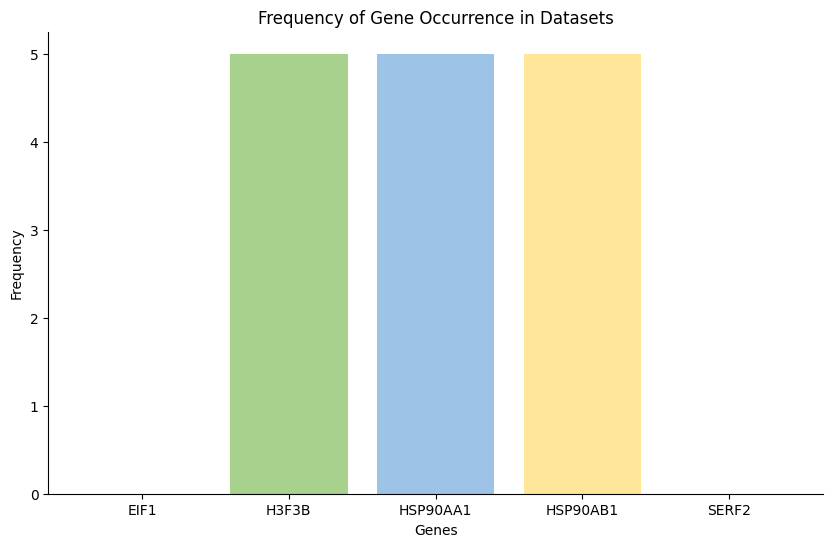

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

Chin_genes = Chin_filtered_genomic_df.index
Miller_genes = Miller_filtered_genomic_df.index
Desmedt_genes = Desmedt_filtered_genomic_df.index
TCGA_genes = TCGA_filtered_genomic_df.index
Caldas_genes = Caldas_filtered_genomic_df.index

gene_intersections = reduce(np.intersect1d, [Chin_genes, Miller_genes, Desmedt_genes, TCGA_genes, Caldas_genes])

gene_list = ['EIF1', 'H3F3B', 'HSP90AA1', 'HSP90AB1', 'SERF2']

gene_frequency = {gene: 0 for gene in gene_list}
for gene in gene_list:
    gene_frequency[gene] = sum(gene in dataset for dataset in [Chin_genes, Miller_genes, Desmedt_genes, TCGA_genes, Caldas_genes])

colors = ['#A6A6A6', '#A9D18E', '#9DC3E6', '#FFE699', '#F8CBAD']

plt.figure(figsize=(10, 6))
plt.bar(gene_frequency.keys(), gene_frequency.values(), color=colors)
plt.xlabel('Genes')
plt.ylabel('Frequency')
plt.title('Frequency of Gene Occurrence in Datasets')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.grid(False)

plt.show()

#### Model Training

100%|██████████| 100/100 [00:00<00:00, 102.23it/s]


HSP90AA1 - Mean Accuracy: 0.6702222222222223, Max Accuracy: 0.8222222222222222
HSP90AB1 - Mean Accuracy: 0.6693333333333332, Max Accuracy: 0.8444444444444444
H3F3B - Mean Accuracy: 0.6726666666666666, Max Accuracy: 0.8444444444444444
HSP90AA1+HSP90AB1 - Mean Accuracy: 0.6764444444444444, Max Accuracy: 0.8666666666666667
HSP90AA1+H3F3B - Mean Accuracy: 0.6744444444444444, Max Accuracy: 0.8666666666666667
HSP90AB1+H3F3B - Mean Accuracy: 0.6726666666666666, Max Accuracy: 0.8444444444444444
HSP90AA1+HSP90AB1+H3F3B - Mean Accuracy: 0.6713333333333334, Max Accuracy: 0.8666666666666667


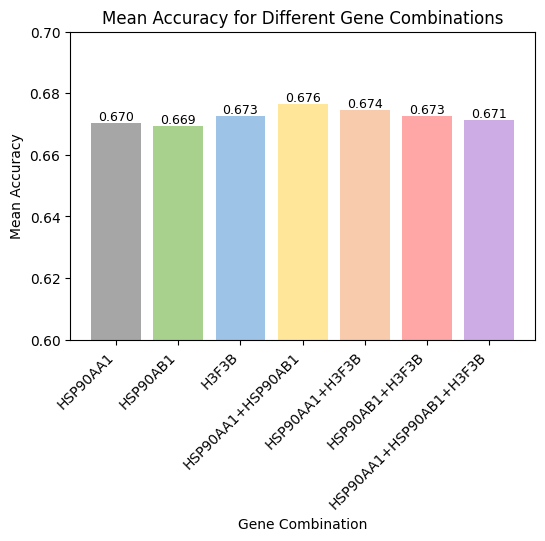

In [15]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import combinations

def linear_func(x, a, b):
    return a * x + b

def weighted_linear_func(x, a, b, weights):
    return weights * (a * x + b)

def weighted_curve_fit(func, xdata, ydata, sample_weight, p0=None, maxfev=10000):
    def weighted_func(x, *params):
        return sample_weight * func(x, *params)

    popt, pcov = curve_fit(lambda x, a, b: weighted_func(x, a, b), xdata, sample_weight * ydata, p0=p0, maxfev=maxfev)
    return popt, pcov

def gene_expression_analysis(gene_list, combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100):
    combat_expressions = {gene: combat_corrected_df.loc[gene, :].T for gene in gene_list}
    combat_time = np.array(combined_clinical_df['time'])[valid_indices]
    combat_batch = np.array(batch_info_df.squeeze())
    binary_time = np.array([1 if time <= 5 else 0 for time in combat_time])

    batch_groups = {}
    for batch in np.unique(combat_batch):
        indices = np.where(combat_batch == batch)[0]
        batch_groups[batch] = indices

    performance_records_combined = []

    for random_state in tqdm(range(random_state_iterations)):
        all_predictions_combined = []
        all_actuals_combined = []

        train_X_all = {gene: [] for gene in gene_list}
        train_y_all = []
        train_binary_y_all = []
        test_X_all = {gene: [] for gene in gene_list}
        test_y_all = []
        test_binary_y_all = []
        test_indices_all = []
        test_batch_all = []
        
        for batch, indices in batch_groups.items():
            X_all = {gene: combat_expressions[gene].iloc[indices].values.reshape(-1, 1) for gene in gene_list}
            y = combat_time[indices]
            binary_y = binary_time[indices]

            X_train_all, X_test_all = {}, {}
            for gene in gene_list:
                X_train_all[gene], X_test_all[gene], _, _, _, _ = train_test_split(X_all[gene], y, binary_y, test_size=0.1, random_state=random_state)

            y_train, y_test, binary_y_train, binary_y_test = train_test_split(y, binary_y, test_size=0.1, random_state=random_state)

            for gene in gene_list:
                train_X_all[gene].extend(X_train_all[gene])
                test_X_all[gene].extend(X_test_all[gene])
            
            train_y_all.extend(y_train)
            train_binary_y_all.extend(binary_y_train)
            test_y_all.extend(y_test)
            test_binary_y_all.extend(binary_y_test)
            test_indices_all.extend(indices[len(X_train_all[gene_list[0]]):])
            test_batch_all.extend([batch] * len(binary_y_test)) 
            
        train_X_all = {gene: np.vstack(train_X_all[gene]).flatten() for gene in gene_list}
        test_X_all = {gene: np.vstack(test_X_all[gene]).flatten() for gene in gene_list}
        train_y_all = np.hstack(train_y_all)
        train_binary_y_all = np.hstack(train_binary_y_all)
        test_y_all = np.hstack(test_y_all)
        test_binary_y_all = np.hstack(test_binary_y_all)
        test_indices_all = np.array(test_indices_all)
        test_batch_all = np.hstack(test_batch_all)
        
        weights = np.array([1.05 if y == 1 else 1 for y in train_binary_y_all])

        popts = {}
        for gene in gene_list:
            popts[gene], _ = weighted_curve_fit(linear_func, train_X_all[gene], train_y_all, weights)

        pred_y_all = {gene: linear_func(test_X_all[gene], *popts[gene]) for gene in gene_list}

        final_pred_y_combined = np.mean([pred_y_all[gene] for gene in gene_list], axis=0)
        final_pred_binary_y_combined = np.array([1 if y <= 5 else 0 for y in final_pred_y_combined])
        all_predictions_combined.extend(final_pred_binary_y_combined)
        all_actuals_combined.extend(test_binary_y_all)

        overall_accuracy_combined = accuracy_score(all_actuals_combined, all_predictions_combined)
        performance_records_combined.append(overall_accuracy_combined)
    return performance_records_combined

colors = ['#A6A6A6', '#A9D18E', '#9DC3E6', '#FFE699', '#F8CBAD', '#FFA7A7', '#CDACE6']

genes = ['HSP90AA1', 'HSP90AB1', 'H3F3B']
all_combinations = sum([list(combinations(genes, i)) for i in range(1, len(genes) + 1)], [])

all_performance_records = {}

for comb in all_combinations:
    performance_records = gene_expression_analysis(list(comb), combat_corrected_df, combined_clinical_df, batch_info_df)
    all_performance_records['+'.join(comb)] = performance_records

mean_accuracies = {}
max_accuracies = {}

for comb, performance in all_performance_records.items():
    mean_accuracies[comb] = np.mean(performance)
    max_accuracies[comb] = np.max(performance)
    print(f"{comb} - Mean Accuracy: {mean_accuracies[comb]}, Max Accuracy: {max_accuracies[comb]}")


plt.figure(figsize=(6, 4))
plt.bar(range(len(mean_accuracies)), list(mean_accuracies.values()), color=colors[:len(mean_accuracies)], tick_label=list(mean_accuracies.keys()))

for i, mean_val in enumerate(mean_accuracies.values()):
    plt.text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, color='black')

plt.xlabel('Gene Combination')
plt.ylabel('Mean Accuracy')
plt.ylim(0.6, 0.7)  
plt.title('Mean Accuracy for Different Gene Combinations')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 0.1 100

In [16]:
def gene_expression_analysis_1(gene_list, combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100):
    combat_expressions = {gene: combat_corrected_df.loc[gene, :].T for gene in gene_list}
    combat_time = np.array(combined_clinical_df['time'])[valid_indices]
    combat_batch = np.array(batch_info_df.squeeze())
    binary_time = np.array([1 if time <= 5 else 0 for time in combat_time])
    
    batch_groups = {}
    for batch in np.unique(combat_batch):
        indices = np.where(combat_batch == batch)[0]
        batch_groups[batch] = indices

    performance_records_combined = []
    performance_records_per_batch = {'Caldas': [], 'Chin': [], 'Desmedt': [], 'Miller': [], 'TCGA': []}
    
    for random_state in tqdm(range(random_state_iterations)):
        all_predictions_combined = []
        all_actuals_combined = []

        train_X_all = {gene: [] for gene in gene_list}
        train_y_all = []
        train_binary_y_all = []
        test_X_all = {gene: [] for gene in gene_list}
        test_y_all = []
        test_binary_y_all = []
        test_indices_all = []
        test_batch_all = []
        
        for batch, indices in batch_groups.items():
            X_all = {gene: combat_expressions[gene].iloc[indices].values.reshape(-1, 1) for gene in gene_list}
            y = combat_time[indices]
            binary_y = binary_time[indices]

            X_train_all, X_test_all = {}, {}
            for gene in gene_list:
                X_train_all[gene], X_test_all[gene], _, _, _, _ = train_test_split(X_all[gene], y, binary_y, test_size=0.1, random_state=random_state)

            y_train, y_test, binary_y_train, binary_y_test = train_test_split(y, binary_y, test_size=0.1, random_state=random_state)

            for gene in gene_list:
                train_X_all[gene].extend(X_train_all[gene])
                test_X_all[gene].extend(X_test_all[gene])
            
            train_y_all.extend(y_train)
            train_binary_y_all.extend(binary_y_train)
            test_y_all.extend(y_test)
            test_binary_y_all.extend(binary_y_test)
            test_indices_all.extend(indices[len(X_train_all[gene_list[0]]):])
            test_batch_all.extend([batch] * len(binary_y_test)) 
            
        train_X_all = {gene: np.vstack(train_X_all[gene]).flatten() for gene in gene_list}
        test_X_all = {gene: np.vstack(test_X_all[gene]).flatten() for gene in gene_list}
        train_y_all = np.hstack(train_y_all)
        train_binary_y_all = np.hstack(train_binary_y_all)
        test_y_all = np.hstack(test_y_all)
        test_binary_y_all = np.hstack(test_binary_y_all)
        test_indices_all = np.array(test_indices_all)
        test_batch_all = np.hstack(test_batch_all)
        
        weights = np.array([1.05 if y == 1 else 1 for y in train_binary_y_all])

        popts = {}
        for gene in gene_list:
            popts[gene], _ = weighted_curve_fit(linear_func, train_X_all[gene], train_y_all, weights)

        pred_y_all = {gene: linear_func(test_X_all[gene], *popts[gene]) for gene in gene_list}

        final_pred_y_combined = np.mean([pred_y_all[gene] for gene in gene_list], axis=0)
        final_pred_binary_y_combined = np.array([1 if y <= 5 else 0 for y in final_pred_y_combined])
        all_predictions_combined.extend(final_pred_binary_y_combined)
        all_actuals_combined.extend(test_binary_y_all)
        overall_accuracy_combined = accuracy_score(all_actuals_combined, all_predictions_combined)
        performance_records_combined.append(overall_accuracy_combined)

        for batch in np.unique(test_batch_all):
            batch_indices = np.where(test_batch_all == batch)[0]
            batch_actuals = np.array(all_actuals_combined)[batch_indices]
            batch_predictions = np.array(all_predictions_combined)[batch_indices]
            batch_accuracy = accuracy_score(batch_actuals, batch_predictions)
            performance_records_per_batch[batch].append(batch_accuracy)

    return performance_records_combined, performance_records_per_batch

In [17]:
def gene_expression_analysis_2(gene_list, combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100):

    combat_expressions = {gene: combat_corrected_df.loc[gene, :].T for gene in gene_list}
    combat_time = np.array(combined_clinical_df['time'])[valid_indices]
    combat_batch = np.array(batch_info_df.squeeze())
    binary_time = np.array([1 if time <= 5 else 0 for time in combat_time])
    
    ########## Balance binary_time classes
    class_0_indices = np.where(binary_time == 0)[0]
    class_1_indices = np.where(binary_time == 1)[0]
    min_class_size = min(len(class_0_indices), len(class_1_indices))

    # Subsample the larger class
    np.random.seed(100024)  # Set seed for reproducibility
    balanced_indices = np.concatenate([
        np.random.choice(class_0_indices, min_class_size, replace=False),
        np.random.choice(class_1_indices, min_class_size, replace=False)
    ])
    np.random.shuffle(balanced_indices)  # Shuffle indices for randomness

    ######### Subset data based on balanced indices
    combat_expressions = {gene: combat_expressions[gene].iloc[balanced_indices] for gene in combat_expressions}
    combat_time = combat_time[balanced_indices]
    combat_batch = combat_batch[balanced_indices]
    binary_time = binary_time[balanced_indices]
    
    batch_groups = {}
    for batch in np.unique(combat_batch):
        indices = np.where(combat_batch == batch)[0]
        batch_groups[batch] = indices

    performance_records_combined = []
    performance_records_per_batch = {'Caldas': [], 'Chin': [], 'Desmedt': [], 'Miller': [], 'TCGA': []}
    
    for random_state in tqdm(range(random_state_iterations)):
        all_predictions_combined = []
        all_actuals_combined = []

        train_X_all = {gene: [] for gene in gene_list}
        train_y_all = []
        train_binary_y_all = []
        test_X_all = {gene: [] for gene in gene_list}
        test_y_all = []
        test_binary_y_all = []
        test_indices_all = []
        test_batch_all = []
        
        for batch, indices in batch_groups.items():
            X_all = {gene: combat_expressions[gene].iloc[indices].values.reshape(-1, 1) for gene in gene_list}
            y = combat_time[indices]
            binary_y = binary_time[indices]

            X_train_all, X_test_all = {}, {}
            for gene in gene_list:
                X_train_all[gene], X_test_all[gene], _, _, _, _ = train_test_split(X_all[gene], y, binary_y, test_size=0.1, random_state=random_state)

            y_train, y_test, binary_y_train, binary_y_test = train_test_split(y, binary_y, test_size=0.1, random_state=random_state)

            for gene in gene_list:
                train_X_all[gene].extend(X_train_all[gene])
                test_X_all[gene].extend(X_test_all[gene])
            
            train_y_all.extend(y_train)
            train_binary_y_all.extend(binary_y_train)
            test_y_all.extend(y_test)
            test_binary_y_all.extend(binary_y_test)
            test_indices_all.extend(indices[len(X_train_all[gene_list[0]]):])
            test_batch_all.extend([batch] * len(binary_y_test)) 
            
        train_X_all = {gene: np.vstack(train_X_all[gene]).flatten() for gene in gene_list}
        test_X_all = {gene: np.vstack(test_X_all[gene]).flatten() for gene in gene_list}
        train_y_all = np.hstack(train_y_all)
        train_binary_y_all = np.hstack(train_binary_y_all)
        test_y_all = np.hstack(test_y_all)
        test_binary_y_all = np.hstack(test_binary_y_all)
        test_indices_all = np.array(test_indices_all)
        test_batch_all = np.hstack(test_batch_all)
        
        weights = np.array([1.05 if y == 1 else 1 for y in train_binary_y_all])

        popts = {}
        for gene in gene_list:
            popts[gene], _ = weighted_curve_fit(linear_func, train_X_all[gene], train_y_all, weights)

        pred_y_all = {gene: linear_func(test_X_all[gene], *popts[gene]) for gene in gene_list}

        final_pred_y_combined = np.mean([pred_y_all[gene] for gene in gene_list], axis=0)
        final_pred_binary_y_combined = np.array([1 if y <= 5 else 0 for y in final_pred_y_combined])
        all_predictions_combined.extend(final_pred_binary_y_combined)
        all_actuals_combined.extend(test_binary_y_all)
        overall_accuracy_combined = accuracy_score(all_actuals_combined, all_predictions_combined)
        performance_records_combined.append(overall_accuracy_combined)

        for batch in np.unique(test_batch_all):
            batch_indices = np.where(test_batch_all == batch)[0]
            batch_actuals = np.array(all_actuals_combined)[batch_indices]
            batch_predictions = np.array(all_predictions_combined)[batch_indices]
            batch_accuracy = accuracy_score(batch_actuals, batch_predictions)
            performance_records_per_batch[batch].append(batch_accuracy)

    return performance_records_combined, performance_records_per_batch

100%|██████████| 100/100 [00:00<00:00, 108.53it/s]


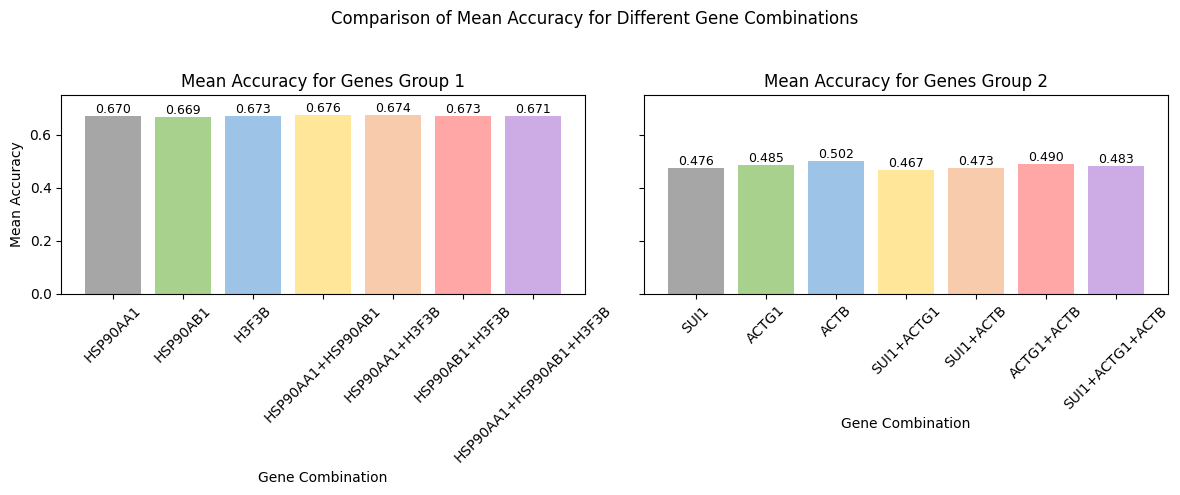

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

colors = ['#A6A6A6', '#A9D18E', '#9DC3E6', '#FFE699', '#F8CBAD', '#FFA7A7', '#CDACE6']

genes_1 = ['HSP90AA1', 'HSP90AB1', 'H3F3B']
all_combinations_1 = sum([list(combinations(genes_1, i)) for i in range(1, len(genes_1) + 1)], [])

all_performance_records_1 = {}
performance_records_batch_1 = {}

for comb in all_combinations_1:
    performance_records, performance_records_per_batch = gene_expression_analysis_1(list(comb), combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100)
    all_performance_records_1['+'.join(comb)] = performance_records
    performance_records_batch_1['+'.join(comb)] = performance_records_per_batch

mean_accuracies_1 = {comb: np.mean(performance) for comb, performance in all_performance_records_1.items()}

genes_2 = ['SUI1', 'ACTG1', 'ACTB']
all_combinations_2 = sum([list(combinations(genes_2, i)) for i in range(1, len(genes_2) + 1)], [])

all_performance_records_2 = {}
performance_records_batch_2 = {}
for comb in all_combinations_2:
    performance_records, performance_records_per_batch = gene_expression_analysis_2(list(comb), combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100)
    all_performance_records_2['+'.join(comb)] = performance_records
    performance_records_batch_2['+'.join(comb)] = performance_records_per_batch

mean_accuracies_2 = {comb: np.mean(performance) for comb, performance in all_performance_records_2.items()}

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].bar(range(len(mean_accuracies_1)), list(mean_accuracies_1.values()), color=colors[:len(mean_accuracies_1)], tick_label=list(mean_accuracies_1.keys()))
for i, mean_val in enumerate(mean_accuracies_1.values()):
    axes[0].text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, color='black')
axes[0].set_xlabel('Gene Combination')
axes[0].set_ylabel('Mean Accuracy')
axes[0].set_ylim(0.0, 0.75)
axes[0].set_title('Mean Accuracy for Genes Group 1')
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(range(len(mean_accuracies_2)), list(mean_accuracies_2.values()), color=colors[:len(mean_accuracies_2)], tick_label=list(mean_accuracies_2.keys()))
for i, mean_val in enumerate(mean_accuracies_2.values()):
    axes[1].text(i, mean_val, f'{mean_val:.3f}', ha='center', va='bottom', fontsize=9, color='black')
axes[1].set_xlabel('Gene Combination')
axes[1].set_title('Mean Accuracy for Genes Group 2')
axes[1].tick_params(axis='x', rotation=45)

plt.suptitle('Comparison of Mean Accuracy for Different Gene Combinations')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [27]:
def gene_expression_analysis(gene_list, combat_corrected_df, combined_clinical_df, batch_info_df, random_state_iterations=100):
    combat_expressions = {gene: combat_corrected_df.loc[gene, :].T for gene in gene_list}
    combat_time = np.array(combined_clinical_df['time'])[valid_indices]
    combat_batch = np.array(batch_info_df.squeeze())
    binary_time = np.array([1 if time <= 5 else 0 for time in combat_time])
    
    batch_groups = {}
    for batch in np.unique(combat_batch):
        indices = np.where(combat_batch == batch)[0]
        batch_groups[batch] = indices

    performance_records_combined = []
    performance_records_per_batch = {'Caldas': [], 'Chin': [], 'Desmedt': [], 'Miller': [], 'TCGA': []}
    
    for random_state in tqdm(range(random_state_iterations)):
        all_predictions_combined = []
        all_actuals_combined = []

        train_X_all = {gene: [] for gene in gene_list}
        train_y_all = []
        train_binary_y_all = []
        test_X_all = {gene: [] for gene in gene_list}
        test_y_all = []
        test_binary_y_all = []
        test_indices_all = []
        test_batch_all = []
        
        for batch, indices in batch_groups.items():
            X_all = {gene: combat_expressions[gene].iloc[indices].values.reshape(-1, 1) for gene in gene_list}
            y = combat_time[indices]
            binary_y = binary_time[indices]

            X_train_all, X_test_all = {}, {}
            for gene in gene_list:
                X_train_all[gene], X_test_all[gene], _, _, _, _ = train_test_split(X_all[gene], y, binary_y, test_size=0.1, random_state=random_state)

            y_train, y_test, binary_y_train, binary_y_test = train_test_split(y, binary_y, test_size=0.1, random_state=random_state)

            for gene in gene_list:
                train_X_all[gene].extend(X_train_all[gene])
                test_X_all[gene].extend(X_test_all[gene])
            
            train_y_all.extend(y_train)
            train_binary_y_all.extend(binary_y_train)
            test_y_all.extend(y_test)
            test_binary_y_all.extend(binary_y_test)
            test_indices_all.extend(indices[len(X_train_all[gene_list[0]]):])
            test_batch_all.extend([batch] * len(binary_y_test)) 
            
        train_X_all = {gene: np.vstack(train_X_all[gene]).flatten() for gene in gene_list}
        test_X_all = {gene: np.vstack(test_X_all[gene]).flatten() for gene in gene_list}
        train_y_all = np.hstack(train_y_all)
        train_binary_y_all = np.hstack(train_binary_y_all)
        test_y_all = np.hstack(test_y_all)
        test_binary_y_all = np.hstack(test_binary_y_all)
        test_indices_all = np.array(test_indices_all)
        test_batch_all = np.hstack(test_batch_all)
        
        weights = np.array([1.05 if y == 1 else 1 for y in train_binary_y_all])

        popts = {}
        for gene in gene_list:
            popts[gene], _ = weighted_curve_fit(linear_func, train_X_all[gene], train_y_all, weights)

        pred_y_all = {gene: linear_func(test_X_all[gene], *popts[gene]) for gene in gene_list}

        final_pred_y_combined = np.mean([pred_y_all[gene] for gene in gene_list], axis=0)
        final_pred_binary_y_combined = np.array([1 if y <= 5 else 0 for y in final_pred_y_combined])
        all_predictions_combined.extend(final_pred_binary_y_combined)
        all_actuals_combined.extend(test_binary_y_all)
        overall_accuracy_combined = accuracy_score(all_actuals_combined, all_predictions_combined)
        performance_records_combined.append(overall_accuracy_combined)

        for batch in np.unique(test_batch_all):
            batch_indices = np.where(test_batch_all == batch)[0]
            batch_actuals = np.array(all_actuals_combined)[batch_indices]
            batch_predictions = np.array(all_predictions_combined)[batch_indices]
            batch_accuracy = accuracy_score(batch_actuals, batch_predictions)
            performance_records_per_batch[batch].append(batch_accuracy)

    return performance_records_combined, performance_records_per_batch

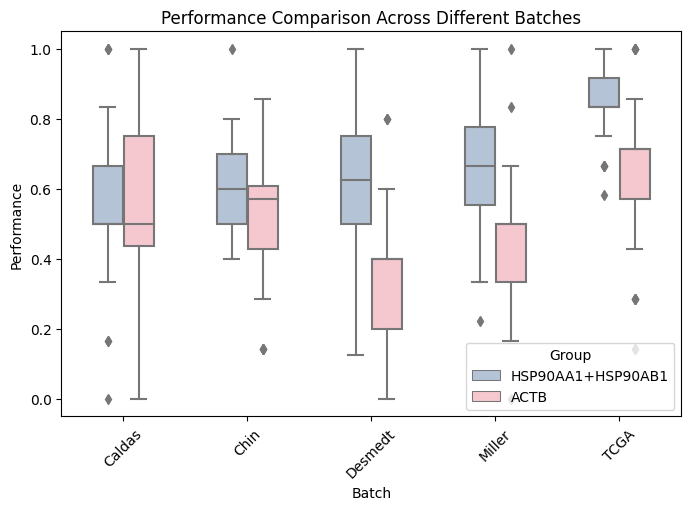

In [28]:
# Extract and prepare data for the first group
batch_df1 = pd.DataFrame.from_dict(performance_records_batch_1['HSP90AA1+HSP90AB1'])
batch_df1 = batch_df1.melt(var_name='Batch', value_name='Performance')
batch_df1['Group'] = 'HSP90AA1+HSP90AB1'

# Extract and prepare data for the second group
batch_df2 = pd.DataFrame.from_dict(performance_records_batch_2['ACTB'])
batch_df2 = batch_df2.melt(var_name='Batch', value_name='Performance')
batch_df2['Group'] = 'ACTB'

# Combine both groups into one DataFrame
combined_df = pd.concat([batch_df1, batch_df2], ignore_index=True)

# Update the color palette to use the specified colors
custom_colors = ['#AFC2DC', '#FDBFCA']  # Replace with the new colors

# Combine and plot the two groups of boxplots on the same canvas with the updated colors
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the boxplot with the new colors
sns.boxplot(
    data=combined_df,
    x='Batch',
    y='Performance',
    hue='Group',
    palette=custom_colors,  # Use the updated colors
    width=0.5,
    dodge=True,
    ax=ax
)

# Add titles and labels
ax.set_title('Performance Comparison Across Different Batches')
ax.set_xlabel('Batch')
ax.set_ylabel('Performance')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Group')

plt.show()